 ### BUSINESS CASE :
 >-No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business due to new compititors retaining customers was becoming a challenge.
>- In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%.
>- No-Churn wants to explore possibility of Machine Learning to help with retaining the customers and also have competitive edge in the industry.


## PROJECT GOAL :
> 



Help No-Churn with their use caes with Machine Learning :-
Finding out why customer
>- leave.
Creating scores tocustomers  predict who migh>-t leave.
Using a "CHURN-FLAG" to quickly help and offer deals to customers who mig>-ht leave.
"CHURN-FLAG" is like a simple flag - it's either up for "YES" (might leave) or down for "NO"(probaly staying).
It helps business know which customers might leave and need extra attention.

# IMPORTING LIBRARIES

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CONNECTING AND LOADING DATASET THROUGH SQL:

In [3]:
!pip install mysql-connector-python
import mysql.connector
import pandas as pd


# Establish a connection to the MySQL database  
conn = mysql.connector.connect(  
    host='18.136.157.135',         # e.g., 'localhost'  
    user=' dm_team3',         # your username  
    password='DM!$!Team!27@9!20&', # your password  
    database=' project_telecom'  # your database name  
)  

# SQL query to extract data  
query = "SELECT * FROM  telecom_churn_data;"  # Replace with your actual table name  

# Extract data using pandas  
df = pd.read_sql_query(query, conn)  

# Close the connection  
conn.close()  

# Display the extracted data  
print(df)  

Defaulting to user installation because normal site-packages is not writeable


C:\Users\Saira Banu\AppData\Local\Temp\ipykernel_18800\3425228318.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


     columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...     

In [4]:
df

columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...        99     16.78     244.7        91   
1       161.6      123     27.47  ...       103     16.62     254.4       103   
2       243.4      114     41.38  ...       110      10.3     162.6       104   
3       299.4       71      50.9  ...        88      5.26     196.9        89   
4       166.7      113     28.34  ...       122     12.61     186.9       121   
...       ...      ...       ...  ...       ...       ...       ...       ...   
4612      144       81     24.48  ...       112     15.91     158.6       122   
4613      189       91     32.13  ...        96     25.76     163.6       116   
4614    127.5      126     21.68  ...       129     25.17     200.9        91   
4615    168.9       98     28.71  ...       117     19.24     165.5        96   
4616    204.7      100      34.8  ...       107     10.78     202.8       115   

     columns16 columns17 columns18 columns19 columns20 columns21  
0        11.01        10         3       2.7         1    False.  
1        11.45      13.7         3       3.7         1    False.  
2         7.32      12.2         5      3.29         0    False.  
3         8.86       6.6         7      1.78         2    False.  
4         8.41      10.1         3      2.73         3    False.  
...        ...       ...       ...       ...       ...       ...  
4612      7.14       8.5         6       2.3         3    False.  
4613      7.36      15.7         1      4.24         3    False.  
4614      9.04        13         3      3.51         1    False.  
4615      7.45      14.3         3      3.86         0    False.  
4616      9.13      12.1         4      3.27         2    False.  

[4617 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [6]:
df.describe()

columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
count      4617     4617     4617       4617     4617     4617     4617   
unique       51      218        3       4617        2        2       47   
top          WV       90      415   382-4657       no       no        0   
freq        149       63     2299          1     4171     3381     3381   

       columns8 columns9 columns10  ... columns12 columns13 columns14  \
count      4617     4617      4617  ...      4617      4617      4617   
unique     1901      123      1901  ...       125      1621      1813   
top         154      102     26.18  ...       105     14.25     194.3   
freq         10      108        10  ...       111        15        10   

       columns15 columns16 columns17 columns18 columns19 columns20 columns21  
count       4617      4617      4617      4617      4617      4617      4617  
unique       130      1012       168        21       168        10         2  
top          105      9.66       9.8         3      2.65         1    False.  
freq         115        19        81       925        81      1651      3961  

[4 rows x 21 columns]

## RENAMING COLUMNS

In [7]:
df1=df.rename(columns={'columns1':'State', 'columns2':'Account_Length', 'columns3':'Area_Code', 'columns4':'Phone',
                  'columns5': 'International_Plan','columns6': 'VMail_Plan','columns7': 'VMail_Message','columns8':'Day_Mins',
                  'columns9':'Day_Calls','columns10':'Day_Charge','columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge',
                  'columns14':'Night_Mins','columns15':'Night_Calls','columns16':'Night_Charge','columns17':'International_Mins','columns18':'International_Calls',
                  'columns19': 'International_Charge','columns20':'CustServ_Calls','columns21':'Churn'})
print(df1)

     State Account_Length Area_Code      Phone International_Plan VMail_Plan  \
0       KS            128       415   382-4657                 no        yes   
1       OH            107       415   371-7191                 no        yes   
2       NJ            137       415   358-1921                 no         no   
3       OH             84       408   375-9999                yes         no   
4       OK             75       415   330-6626                yes         no   
...    ...            ...       ...        ...                ...        ...   
4612    NY             57       510   345-7512                 no        yes   
4613    NM            177       408   343-6820                 no        yes   
4614    VT             67       408   338-4794                 no        yes   
4615    MI             98       415   355-8388                 no        yes   
4616    IN            140       415   409-6884                 no         no   

     VMail_Message Day_Mins Day_Calls D

In [8]:
df1

State Account_Length Area_Code      Phone International_Plan VMail_Plan  \
0       KS            128       415   382-4657                 no        yes   
1       OH            107       415   371-7191                 no        yes   
2       NJ            137       415   358-1921                 no         no   
3       OH             84       408   375-9999                yes         no   
4       OK             75       415   330-6626                yes         no   
...    ...            ...       ...        ...                ...        ...   
4612    NY             57       510   345-7512                 no        yes   
4613    NM            177       408   343-6820                 no        yes   
4614    VT             67       408   338-4794                 no        yes   
4615    MI             98       415   355-8388                 no        yes   
4616    IN            140       415   409-6884                 no         no   

     VMail_Message Day_Mins Day_Calls Day_Charge  ... Eve_Calls Eve_Charge  \
0               25    265.1       110      45.07  ...        99      16.78   
1               26    161.6       123      27.47  ...       103      16.62   
2                0    243.4       114      41.38  ...       110       10.3   
3                0    299.4        71       50.9  ...        88       5.26   
4                0    166.7       113      28.34  ...       122      12.61   
...            ...      ...       ...        ...  ...       ...        ...   
4612            25      144        81      24.48  ...       112      15.91   
4613            29      189        91      32.13  ...        96      25.76   
4614            33    127.5       126      21.68  ...       129      25.17   
4615            23    168.9        98      28.71  ...       117      19.24   
4616             0    204.7       100       34.8  ...       107      10.78   

     Night_Mins Night_Calls Night_Charge International_Mins  \
0         244.7          91        11.01                 10   
1         254.4         103        11.45               13.7   
2         162.6         104         7.32               12.2   
3         196.9          89         8.86                6.6   
4         186.9         121         8.41               10.1   
...         ...         ...          ...                ...   
4612      158.6         122         7.14                8.5   
4613      163.6         116         7.36               15.7   
4614      200.9          91         9.04                 13   
4615      165.5          96         7.45               14.3   
4616      202.8         115         9.13               12.1   

     International_Calls International_Charge CustServ_Calls    Churn  
0                      3                  2.7              1   False.  
1                      3                  3.7              1   False.  
2                      5                 3.29              0   False.  
3                      7                 1.78              2   False.  
4                      3                 2.73              3   False.  
...                  ...                  ...            ...      ...  
4612                   6                  2.3              3   False.  
4613                   1                 4.24              3   False.  
4614                   3                 3.51              1   False.  
4615                   3                 3.86              0   False.  
4616                   4                 3.27              2   False.  

[4617 rows x 21 columns]

In [9]:
df1.dtypes

State                   object
Account_Length          object
Area_Code               object
Phone                   object
International_Plan      object
VMail_Plan              object
VMail_Message           object
Day_Mins                object
Day_Calls               object
Day_Charge              object
Eve_Mins                object
Eve_Calls               object
Eve_Charge              object
Night_Mins              object
Night_Calls             object
Night_Charge            object
International_Mins      object
International_Calls     object
International_Charge    object
CustServ_Calls          object
Churn                   object
dtype: object

In [10]:
df1.duplicated().sum()

0

In [11]:
print(df1.isnull().sum()) 

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64


## EACH COLUMN REPRESENTATION

In [12]:
# Account_Length: This column represents the number of months a customer has been with the telecommunications company. It indicates the duration of the customer's account.

# Area_Code: This column contains numerical codes representing the geographic area or region associated with a customer's phone number.

# VMail_Message: It represents the number of voicemail messages received by the customer. This column provides insights into how often customers receive voicemail.

# Day_Mins: This column represents the total number of minutes a customer has used their phone during the day.

# Day_Calls: It indicates the total number of calls made by a customer during the day.

# Day_Charge: This column represents the total charge incurred by a customer for daytime phone usage.

# Eve_Mins: It represents the total number of minutes a customer has used their phone during the evening.

# Eve_Calls: This column indicates the total number of calls made by a customer during the evening.

# Eve_Charge: It represents the total charge incurred by a customer for evening phone usage.

# Night_Mins: This column represents the total number of minutes a customer has used their phone during the night.

# Night_Calls: It indicates the total number of calls made by a customer during the night.

# Night_Charge: This column represents the total charge incurred by a customer for nighttime phone usage.

# International_Mins: It represents the total number of international minutes used by a customer.

# International_calls: This column indicates the total number of international calls made by a customer.

# International_Charge: It represents the total charge incurred by a customer for international phone usage.

# CustServ_Calls: This column indicates the total number of customer service calls made by a customer. It reflects instances where a customer has contacted customer service for assistance.

<Axes: >

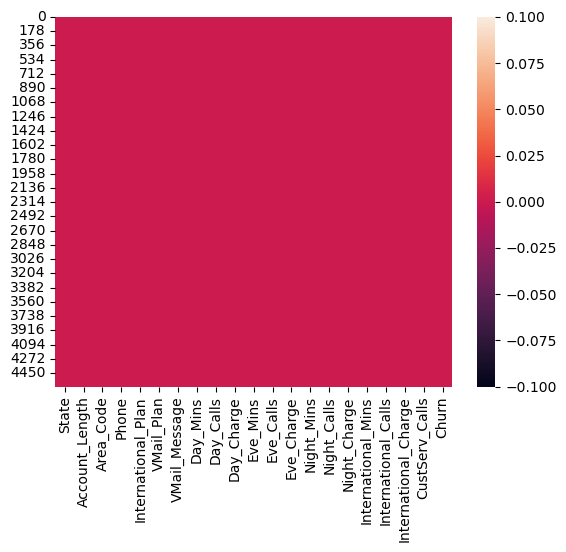

In [13]:
sns.heatmap(df1.isnull())

## CONVERT  DATATYPE

In [14]:
df1['State'] = df1['State'].astype('object')
df1['Account_Length'] = df1['Account_Length'].astype('int64')
df1['Area_Code'] = df1['Area_Code'].astype('int64')
df1['Phone'] = df1['Phone'].astype('object')
df1['International_Plan'] = df1['International_Plan'].astype('object')
df1['VMail_Plan'] = df1['VMail_Plan'].astype('object')
df1['VMail_Message'] = df1['VMail_Message'].astype('int64')
df1['Day_Mins'] = df1['Day_Mins'].astype('float64')
df1['Day_Calls'] = df1['Day_Calls'].astype('int64')
df1['Day_Charge'] = df1['Day_Charge'].astype('float64')
df1['Eve_Mins'] = df1['Eve_Mins'].astype('float64') 
df1['Eve_Calls'] = df1['Eve_Calls'].astype('int64') 
df1['Eve_Charge'] = df1['Eve_Charge'].astype('float64') 
df1['Night_Mins'] = df1['Night_Mins'].astype('float64') 
df1['Night_Calls'] = df1['Night_Calls'].astype('int64') 
df1['Night_Charge'] = df1['Night_Charge'].astype('float64')
df1['International_Mins'] = df1['International_Mins'].astype('float64')
df1['International_Calls'] = df1['International_Calls'].astype('int64') 
df1['International_Charge'] = df1['International_Charge'].astype('float64')
df1['CustServ_Calls'] = df1['CustServ_Calls'].astype('int64')
df1['Churn'] = df1['Churn'].astype('object')

# Print the DataFrame info
print(pd.DataFrame(df1).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

**INSIGHTS**:-

* The DataFrame has 4617 entries (rows) and 21 columns.
* Object: State, Phone, International_Plan, VMail_Plan, Churn
* Int64: Account_Length, Area_Code, VMail_Message, Day_Calls, Eve_Calls, Night_Calls, International_calls, CustServ_Calls
* Float64: Day_Mins, Day_Charge, Eve_Mins, Eve_Charge, Night_Mins, Night_Charge, International_Mins, International_Charge
* All columns have 4617 non-null entries, indicating that there are no missing values in any column.

## Converting 'CHURN' column tO 'CHURN-FLAG' as per client depicting 'CHURN' values as True=1 and False=0 in'CHURN-FLAG' column for the better understanding and predicting of the customers moves with the tariff plans.

In [15]:
# Convert 'Churn' column to numeric: Yes = 1, No = 0
df1['CHURN_FLAG'] = df1['Churn'].apply(lambda x: 1 if 'True' in x else 0)

# Verify the transformation
print(df1[['Churn', 'CHURN_FLAG']].head(20))


      Churn  CHURN_FLAG
0    False.           0
1    False.           0
2    False.           0
3    False.           0
4    False.           0
5    False.           0
6    False.           0
7    False.           0
8    False.           0
9    False.           0
10    True.           1
11   False.           0
12   False.           0
13   False.           0
14   False.           0
15    True.           1
16   False.           0
17   False.           0
18   False.           0
19   False.           0


In [16]:
print(df1.isnull().sum()) 

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
CHURN_FLAG              0
dtype: int64


In [17]:
df1.describe()

Account_Length    Area_Code  VMail_Message     Day_Mins    Day_Calls  \
count     4617.000000  4617.000000    4617.000000  4617.000000  4617.000000   
mean       100.645224   437.046350       7.849903   180.447152   100.054364   
std         39.597194    42.288212      13.592333    53.983540    19.883027   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        100.000000   415.000000       0.000000   180.000000   100.000000   
75%        127.000000   510.000000      17.000000   216.800000   113.000000   
max        243.000000   510.000000      51.000000   351.500000   165.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     30.676576   200.429088   100.179770    17.036703   200.623933   
std       9.177145    50.557001    19.821314     4.297332    50.543616   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   165.900000    87.000000    14.100000   167.100000   
50%      30.600000   200.800000   101.000000    17.070000   200.800000   
75%      36.860000   234.000000   114.000000    19.890000   234.900000   
max      59.760000   363.700000   170.000000    30.910000   395.000000   

       Night_Calls  Night_Charge  International_Mins  International_Calls  \
count  4617.000000   4617.000000         4617.000000          4617.000000   
mean     99.944120      9.028185           10.279294             4.433831   
std      19.935053      2.274488            2.757361             2.457615   
min      12.000000      1.040000            0.000000             0.000000   
25%      87.000000      7.520000            8.600000             3.000000   
50%     100.000000      9.040000           10.300000             4.000000   
75%     113.000000     10.570000           12.100000             6.000000   
max     175.000000     17.770000           20.000000            20.000000   

       International_Charge  CustServ_Calls   CHURN_FLAG  
count           4617.000000     4617.000000  4617.000000  
mean               2.775926        1.567035     0.142084  
std                0.744413        1.307019     0.349174  
min                0.000000        0.000000     0.000000  
25%                2.320000        1.000000     0.000000  
50%                2.780000        1.000000     0.000000  
75%                3.270000        2.000000     0.000000  
max                5.400000        9.000000     1.000000

### INSIGHTS:-


* Account Length:
The average account length is approximately 100.64 months, with a minimum of 1 month and a maximum of 243 months.
The distribution is relatively spread out, with a standard deviation of approximately 39.60.

* Area Code:
The area codes in the dataset range from 408 to 510.
The most common area code appears to be around 415, as it falls within the 50th percentile (median).

* Voicemail Messages:
On average, customers receive around 7.85 voicemail messages, with a maximum of 51.
The majority of customers (at least 75%) have either no voicemail messages or a small number of them.

* Day Usage:
Average day minutes used is 180.45, with a minimum of 0 and a maximum of 351.5.
Average number of day calls is 100.05.
The average charge for daytime usage is $30.68.

* Evening Usage:
Average evening minutes used is 200.43, with a minimum of 0 and a maximum of 363.7.
Average number of evening calls is 100.18.
The average charge for evening usage is $17.04.

* Night Usage:
Average night minutes used is 200.62, with a minimum of 23.2 and a maximum of 395.
Average number of night calls is 99.94.
The average charge for nighttime usage is $9.03.

* International Usage:
Average international minutes used is 10.28, with a minimum of 0 and a maximum of 20.
Average number of international calls is 4.43.
The average charge for international usage is $2.78.

* Customer Service Calls:
On average, customers make approximately 1.57 calls to customer service, with a maximum of 9.

In [18]:
nan_counts = df1.isnull().sum()



In [19]:
nan_counts

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
CHURN_FLAG              0
dtype: int64

### INSIGHTS:-
* There is no null value in any column
* The mean value for the "Area_Code" is 437.046350, which is higher compared to the other features in the dataset.
* The standard deviation for the "Day_Mins" feature is 53.983540, which is higher compared to the standard deviations of other features in the dataset.
* In the context of the dataset, having a value of 0 for VMail_Message, Day_Mins, Day_Calls, Day_Charge,Eve_Mins,	Eve_Calls,	Eve_Charge,International_Mins, International_calls,	International_Charge,CustServ_Calls	 does not necessarily indicate corrupt data. It could simply mean that some customers did not receive any   during the observed period.
* 25th percentile (Q1), 50th percentile (Q2), 75th percentile (Q3)
* The maximum value for the "Area_Code" column is 510.000000, which is higher than the other values in the dataset.

In [20]:
df1

State  Account_Length  Area_Code      Phone International_Plan  \
0       KS             128        415   382-4657                 no   
1       OH             107        415   371-7191                 no   
2       NJ             137        415   358-1921                 no   
3       OH              84        408   375-9999                yes   
4       OK              75        415   330-6626                yes   
...    ...             ...        ...        ...                ...   
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail_Plan  VMail_Message  Day_Mins  Day_Calls  Day_Charge  ...  \
0           yes             25     265.1        110       45.07  ...   
1           yes             26     161.6        123       27.47  ...   
2            no              0     243.4        114       41.38  ...   
3            no              0     299.4         71       50.90  ...   
4            no              0     166.7        113       28.34  ...   
...         ...            ...       ...        ...         ...  ...   
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0          16.78       244.7           91         11.01                10.0   
1          16.62       254.4          103         11.45                13.7   
2          10.30       162.6          104          7.32                12.2   
3           5.26       196.9           89          8.86                 6.6   
4          12.61       186.9          121          8.41                10.1   
...          ...         ...          ...           ...                 ...   
4612       15.91       158.6          122          7.14                 8.5   
4613       25.76       163.6          116          7.36                15.7   
4614       25.17       200.9           91          9.04                13.0   
4615       19.24       165.5           96          7.45                14.3   
4616       10.78       202.8          115          9.13                12.1   

      International_Calls  International_Charge  CustServ_Calls    Churn  \
0                       3                  2.70               1   False.   
1                       3                  3.70               1   False.   
2                       5                  3.29               0   False.   
3                       7                  1.78               2   False.   
4                       3                  2.73               3   False.   
...                   ...                   ...             ...      ...   
4612                    6                  2.30               3   False.   
4613                    1                  4.24               3   False.   
4614                    3                  3.51               1   False.   
4615                    3                  3.86               0   False.   
4616                    4                  3.27               2   False.   

      CHURN_FLAG  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
4612           0  
4613           0  
4614           0  
4615           0  
4616           0  

[4617 rows x 22 columns]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

## DROPPING OF COLUMNS

>-
State: state information is not relevant to our analysis.>-

Area_Code:-Contains three distinct values: 415, 408, and 510.May not provide significant information if the area code is not relevant to your analysis>-.

Phone:-Contains unique values for each customer. Likely serves as a unique identifier and does not contribute much to the analys>-is.

VMail_Message: The majority of values are 0, indicating that most customers do not have voicemail messages. May not provide significant information if voicemail messages are not a key factor in your analysis.

In [22]:
df1.drop('State', axis=1,inplace=True)

In [23]:
df1.drop('Area_Code', axis=1,inplace=True)

In [24]:
df1.drop('Phone', axis=1,inplace=True)

In [25]:
df1.drop('Churn', axis=1,inplace=True)

In [26]:
df1.drop('VMail_Message', axis=1,inplace=True)

In [27]:
df1

Account_Length International_Plan VMail_Plan  Day_Mins  Day_Calls  \
0                128                 no        yes     265.1        110   
1                107                 no        yes     161.6        123   
2                137                 no         no     243.4        114   
3                 84                yes         no     299.4         71   
4                 75                yes         no     166.7        113   
...              ...                ...        ...       ...        ...   
4612              57                 no        yes     144.0         81   
4613             177                 no        yes     189.0         91   
4614              67                 no        yes     127.5        126   
4615              98                 no        yes     168.9         98   
4616             140                 no         no     204.7        100   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_Mins  International_Calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International_Charge  CustServ_Calls  CHURN_FLAG  
0                     2.70               1           0  
1                     3.70               1           0  
2                     3.29               0           0  
3                     1.78               2           0  
4                     2.73               3           0  
...                    ...             ...         ...  
4612                  2.30               3           0  
4613                  4.24               3           0  
4614                  3.51               1           0  
4615                  3.86               0           0  
4616                  3.27               2           0  

[4617 rows x 17 columns]

In [28]:
num_col=df1.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['Account_Length', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_Calls', 'International_Charge',
       'CustServ_Calls', 'CHURN_FLAG'],
      dtype='object')

In [29]:
cat_col=df1.select_dtypes(include=['object'])
cat_col.columns

Index(['International_Plan', 'VMail_Plan'], dtype='object')

## DISTRIBUTION OF DATA

In [30]:
# Iterating over each numerical column in 'num_col'.
for i in num_col :

    # It will print unique values and column name.
    print(df1[i].unique(), i)

    # It will print value counts for each unique value in the column.
    print(df1[i].value_counts())

    # It will print a seperator for clarity.
    print("**********************")

[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221 187  14 238 216
 222 233] Account_Length
Account_Length
90     63
87     56
105    54
93     54
112    53
       ..
200     1
2       1
215 

In [31]:
# Iterating over each numerical column in 'num_col'.
for i in cat_col :

    # It will print unique values and column name.
    print(df1[i].unique(), i)

    # It will print value counts for each unique value in the column.
    print(df1[i].value_counts())

    # It will print a seperator for clarity.
    print("**********************")

[' no' ' yes'] International_Plan
International_Plan
 no     4171
 yes     446
Name: count, dtype: int64
**********************
[' yes' ' no'] VMail_Plan
VMail_Plan
 no     3381
 yes    1236
Name: count, dtype: int64
**********************


## HANDLING CATEGORICAL DATA

In [32]:
cat_col

International_Plan VMail_Plan
0                    no        yes
1                    no        yes
2                    no         no
3                   yes         no
4                   yes         no
...                 ...        ...
4612                 no        yes
4613                 no        yes
4614                 no        yes
4615                 no        yes
4616                 no         no

[4617 rows x 2 columns]

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col['International_Plan'] = encoder.fit_transform(cat_col['International_Plan'])

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col['VMail_Plan'] = encoder.fit_transform(cat_col['VMail_Plan'])

In [35]:
cat_col

International_Plan  VMail_Plan
0                      0           1
1                      0           1
2                      0           0
3                      1           0
4                      1           0
...                  ...         ...
4612                   0           1
4613                   0           1
4614                   0           1
4615                   0           1
4616                   0           0

[4617 rows x 2 columns]

In [36]:
df1=pd.concat([num_col,cat_col],axis=1)

In [37]:
df1

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0                128     265.1        110       45.07     197.4         99   
1                107     161.6        123       27.47     195.5        103   
2                137     243.4        114       41.38     121.2        110   
3                 84     299.4         71       50.90      61.9         88   
4                 75     166.7        113       28.34     148.3        122   
...              ...       ...        ...         ...       ...        ...   
4612              57     144.0         81       24.48     187.2        112   
4613             177     189.0         91       32.13     303.1         96   
4614              67     127.5        126       21.68     296.1        129   
4615              98     168.9         98       28.71     226.3        117   
4616             140     204.7        100       34.80     126.8        107   

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0          16.78       244.7           91         11.01                10.0   
1          16.62       254.4          103         11.45                13.7   
2          10.30       162.6          104          7.32                12.2   
3           5.26       196.9           89          8.86                 6.6   
4          12.61       186.9          121          8.41                10.1   
...          ...         ...          ...           ...                 ...   
4612       15.91       158.6          122          7.14                 8.5   
4613       25.76       163.6          116          7.36                15.7   
4614       25.17       200.9           91          9.04                13.0   
4615       19.24       165.5           96          7.45                14.3   
4616       10.78       202.8          115          9.13                12.1   

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
0                       3                  2.70               1           0   
1                       3                  3.70               1           0   
2                       5                  3.29               0           0   
3                       7                  1.78               2           0   
4                       3                  2.73               3           0   
...                   ...                   ...             ...         ...   
4612                    6                  2.30               3           0   
4613                    1                  4.24               3           0   
4614                    3                  3.51               1           0   
4615                    3                  3.86               0           0   
4616                    4                  3.27               2           0   

      International_Plan  VMail_Plan  
0                      0           1  
1                      0           1  
2                      0           0  
3                      1           0  
4                      1           0  
...                  ...         ...  
4612                   0           1  
4613                   0           1  
4614                   0           1  
4615                   0           1  
4616                   0           0  

[4617 rows x 17 columns]

# **EXPLORATORY DATA ANALYSIS**

# UNIVARIATE ANALYSIS

In [38]:
import sweetviz as sv # library for univariate analysis

my_report = sv.analyze(df1) ## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
df1.columns

Index(['Account_Length', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_Calls', 'International_Charge',
       'CustServ_Calls', 'CHURN_FLAG', 'International_Plan', 'VMail_Plan'],
      dtype='object')

## GRAPHICAL REPRESENTATION USING HISTOGRAM

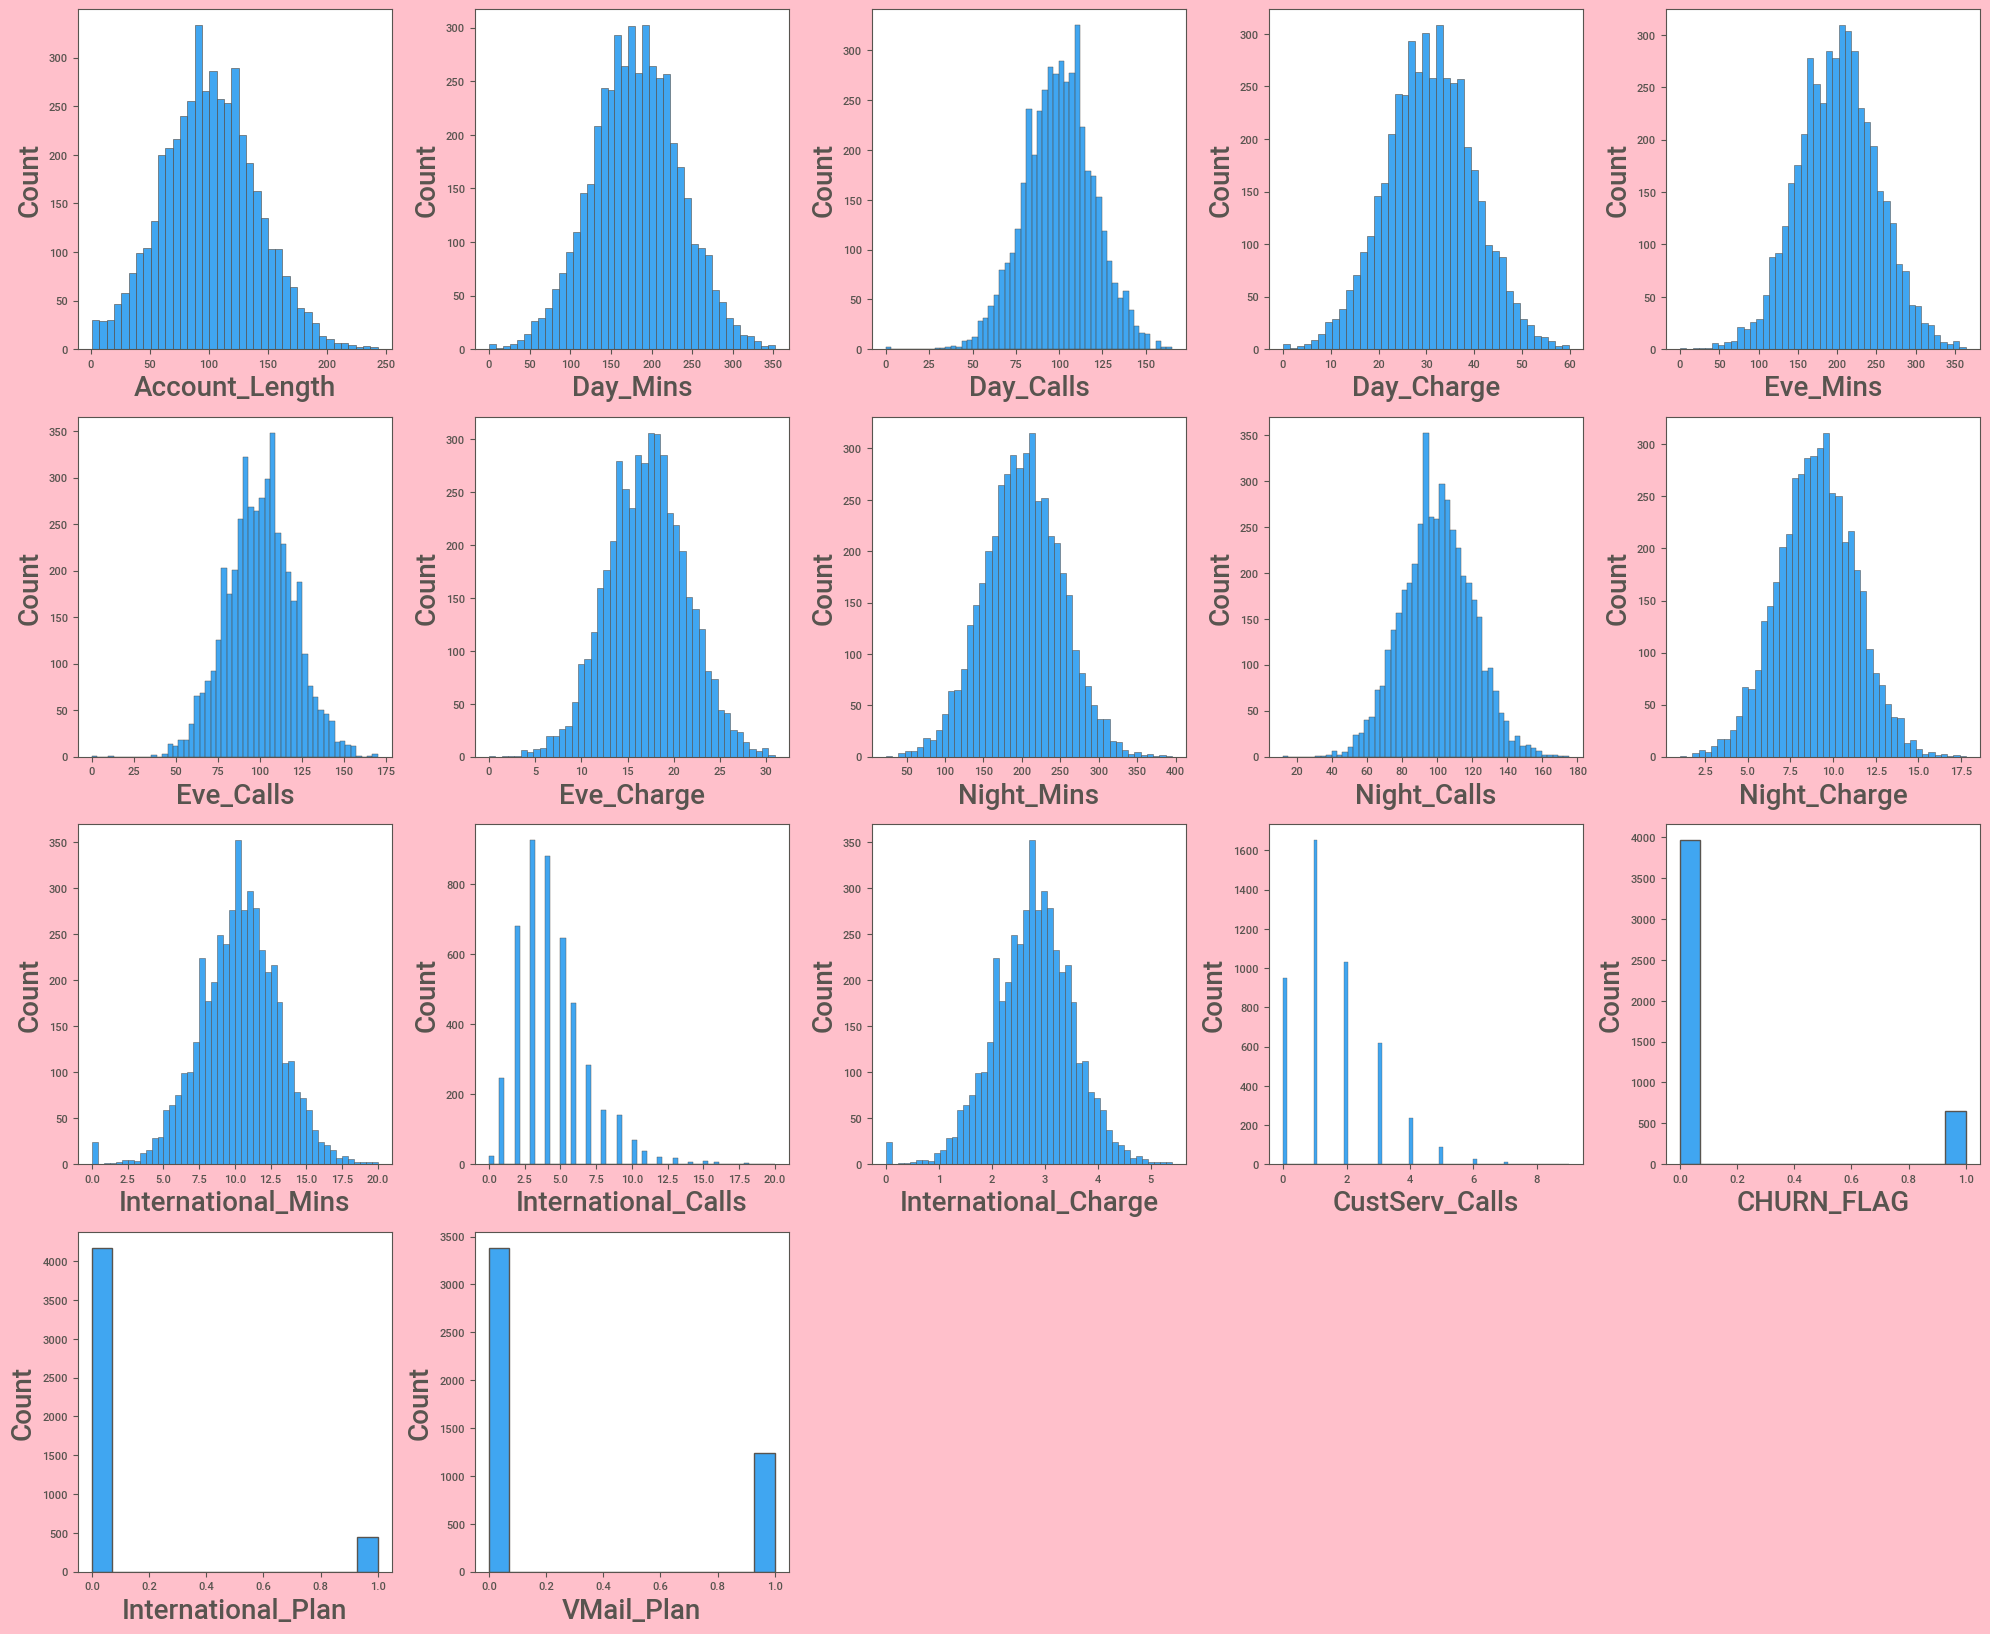

In [40]:
plt.figure(figsize=(20,20), facecolor='pink')

plotnumber=1

for column in df1:
    ax = plt.subplot(5,5,plotnumber)
    sns.histplot(df1[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1

plt.tight_layout()

#### INSIGHTS:-
* The histograms help analyze the count or frequency of values in each feature, providing insights into the data's central tendencies and potential patterns. You can see the graphs showing the counts of all columns.

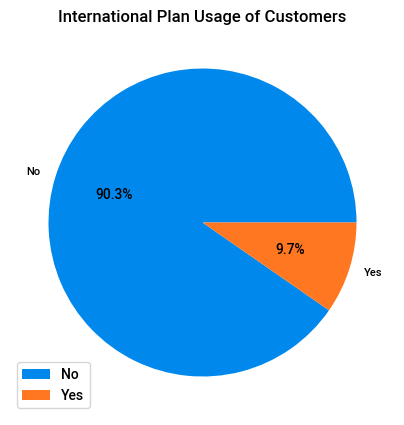

In [41]:
# Counting how many customers have or don't have an international plan.
international_plan_counts = df1['International_Plan'].value_counts()

# Setting up a pie chart with a specific size.
plt.figure(figsize = (5, 5))

# Labels for the two sections of the pie chart.
labels = ['No', 'Yes']

# Creating the pie chart with percentage labels.
plt.pie(international_plan_counts, labels = labels, autopct = '%1.1f%%')

# Adding a legend to show which label corresponds to each section
plt.legend(loc = 'lower left')

# Adding a title to the pie chart.
plt.title('International Plan Usage of Customers')

# Displaying the pie chart.
plt.show()

## Insights
>-In this Pie chart the customers with International Plan usage are 9.7%
>- Customers of about 90.3% are not using International Plan

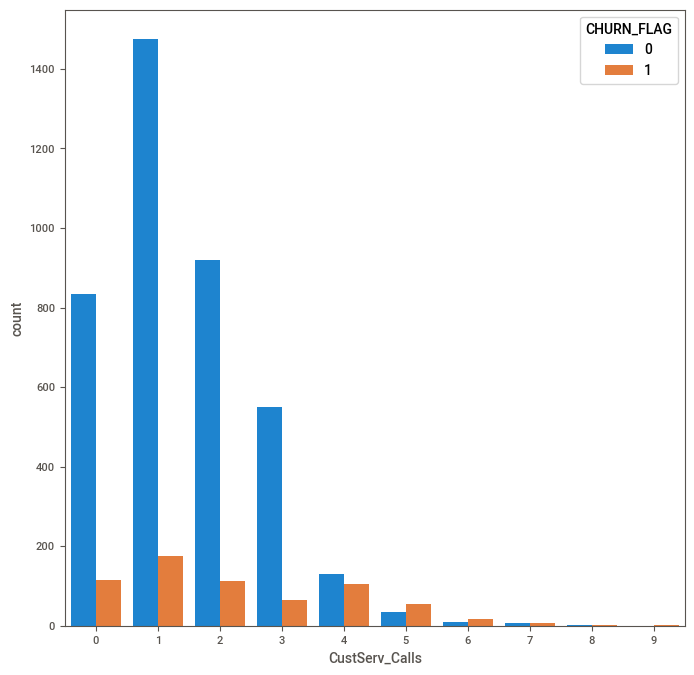

In [42]:
# Setting the size of the figure to 8*8 inches.
plt.figure(figsize = (8,8))

# Creating a count plot for the 'custserv_calls' column with 'churn' as hue in the DataFrame 'data'.
# Count plot shows the distribution of 'custserv_calls' values, and 'hue' colors by 'churn'. 
sns.countplot(x = "CustServ_Calls", hue = "CHURN_FLAG", data = df1)

# Displaying the plot.
plt.show()

# Insights
>-Every Customer who has got Customer Service Calls are likely to have false Churn and leave

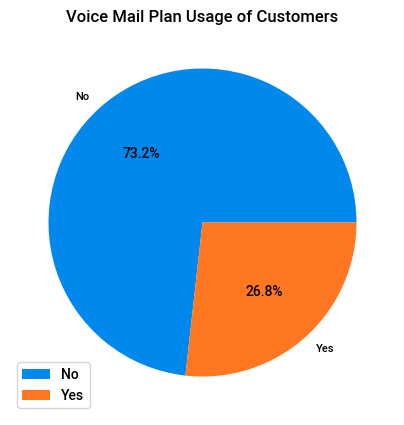

In [43]:
# Counting how many customers have or don't have an international plan.
vmail_plan_counts = df1['VMail_Plan'].value_counts()

# Setting up a pie chart with a specific size.
plt.figure(figsize = (5, 5))

# Labels for the two sections of the pie chart.
labels = ['No', 'Yes']

# Creating the pie chart with percentage labels.
plt.pie(vmail_plan_counts, labels = labels, autopct = '%1.1f%%')

# Adding a legend to show which label corresponds to each section
plt.legend(loc = 'lower left')

# Adding a title to the pie chart.
plt.title('Voice Mail Plan Usage of Customers')

# Displaying the pie chart.
plt.show()

## 27% of customers have subscribed to voicemail.>-
The remaining 73% have not subscribed to voicemail.>-
Among the 73%, no voicemail messages have been recorded.

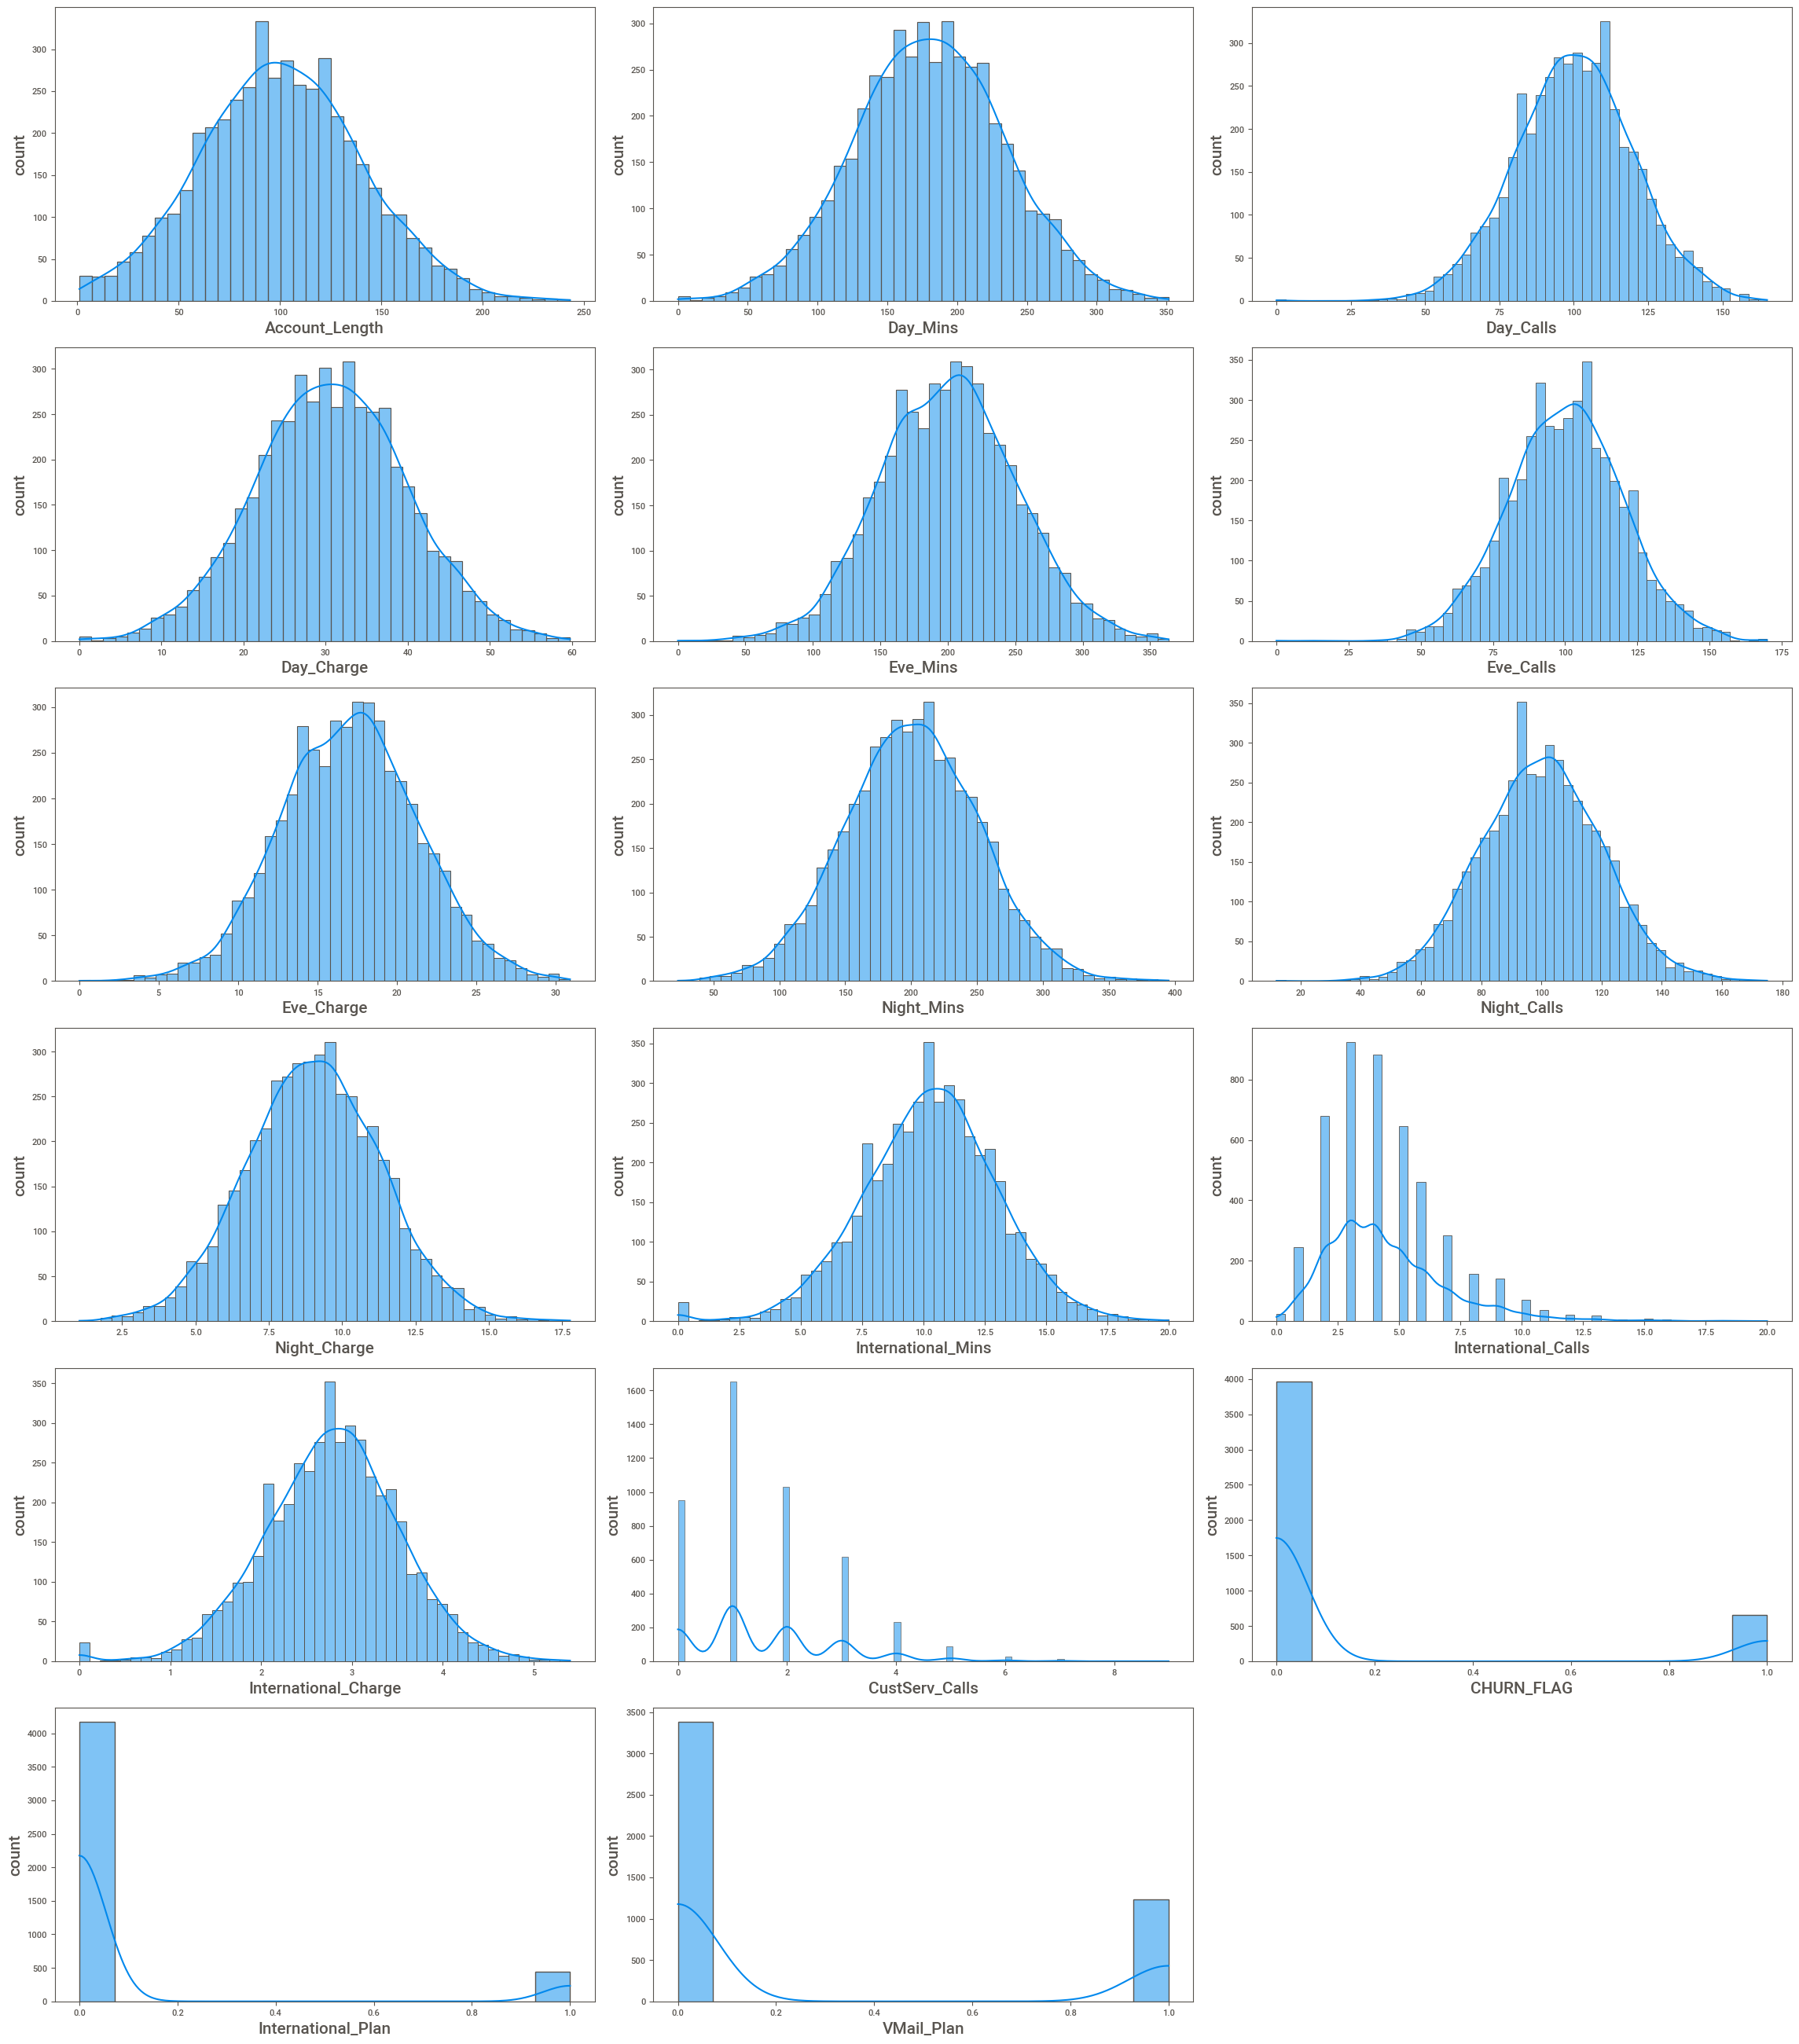

In [44]:
# It will create a new figure with a fixed size and background color.
plt.figure(figsize = (23,30), facecolor = 'white')

# Initializing a counter for subplot placement.
plotnumber = 1

# Looping through each num_col in data :
for column in df1 :

    # Limiting the number of subplots to 16.
    if plotnumber <= 21 :

        # Creating a subplot in a 4*3 grid.
        ax = plt.subplot(7,3, plotnumber)

        # Plotting a histogram with kernel density function.
        sns.histplot(x = df1[column], kde = True)

        # Adding the label to the x and y axes and setting font size.
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('count', fontsize = 15)

    # Incrementing the plot number for the next iteration.
    plotnumber = plotnumber + 1

# Adjusting the layout of the subplots for better spacing.
plt.tight_layout()

# It will display the plot.
plt.show()

## BIVARIATE ANALYSIS

In [45]:
from autoviz.AutoViz_Class import AutoViz_Class

# AutoViz visualization with all available charts
AV = AutoViz_Class()
report = AV.AutoViz(
    filename='',
    dfte=df1,
    max_cols_analyzed=30,
    depVar='CHURN_FLAG'  # Specify the target variable if needed
)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4617, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

Total Number of Scatter Plots = 36
Could not draw some Distribution Plots 'numpy.int64' object has no attribute 'startswith'
All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


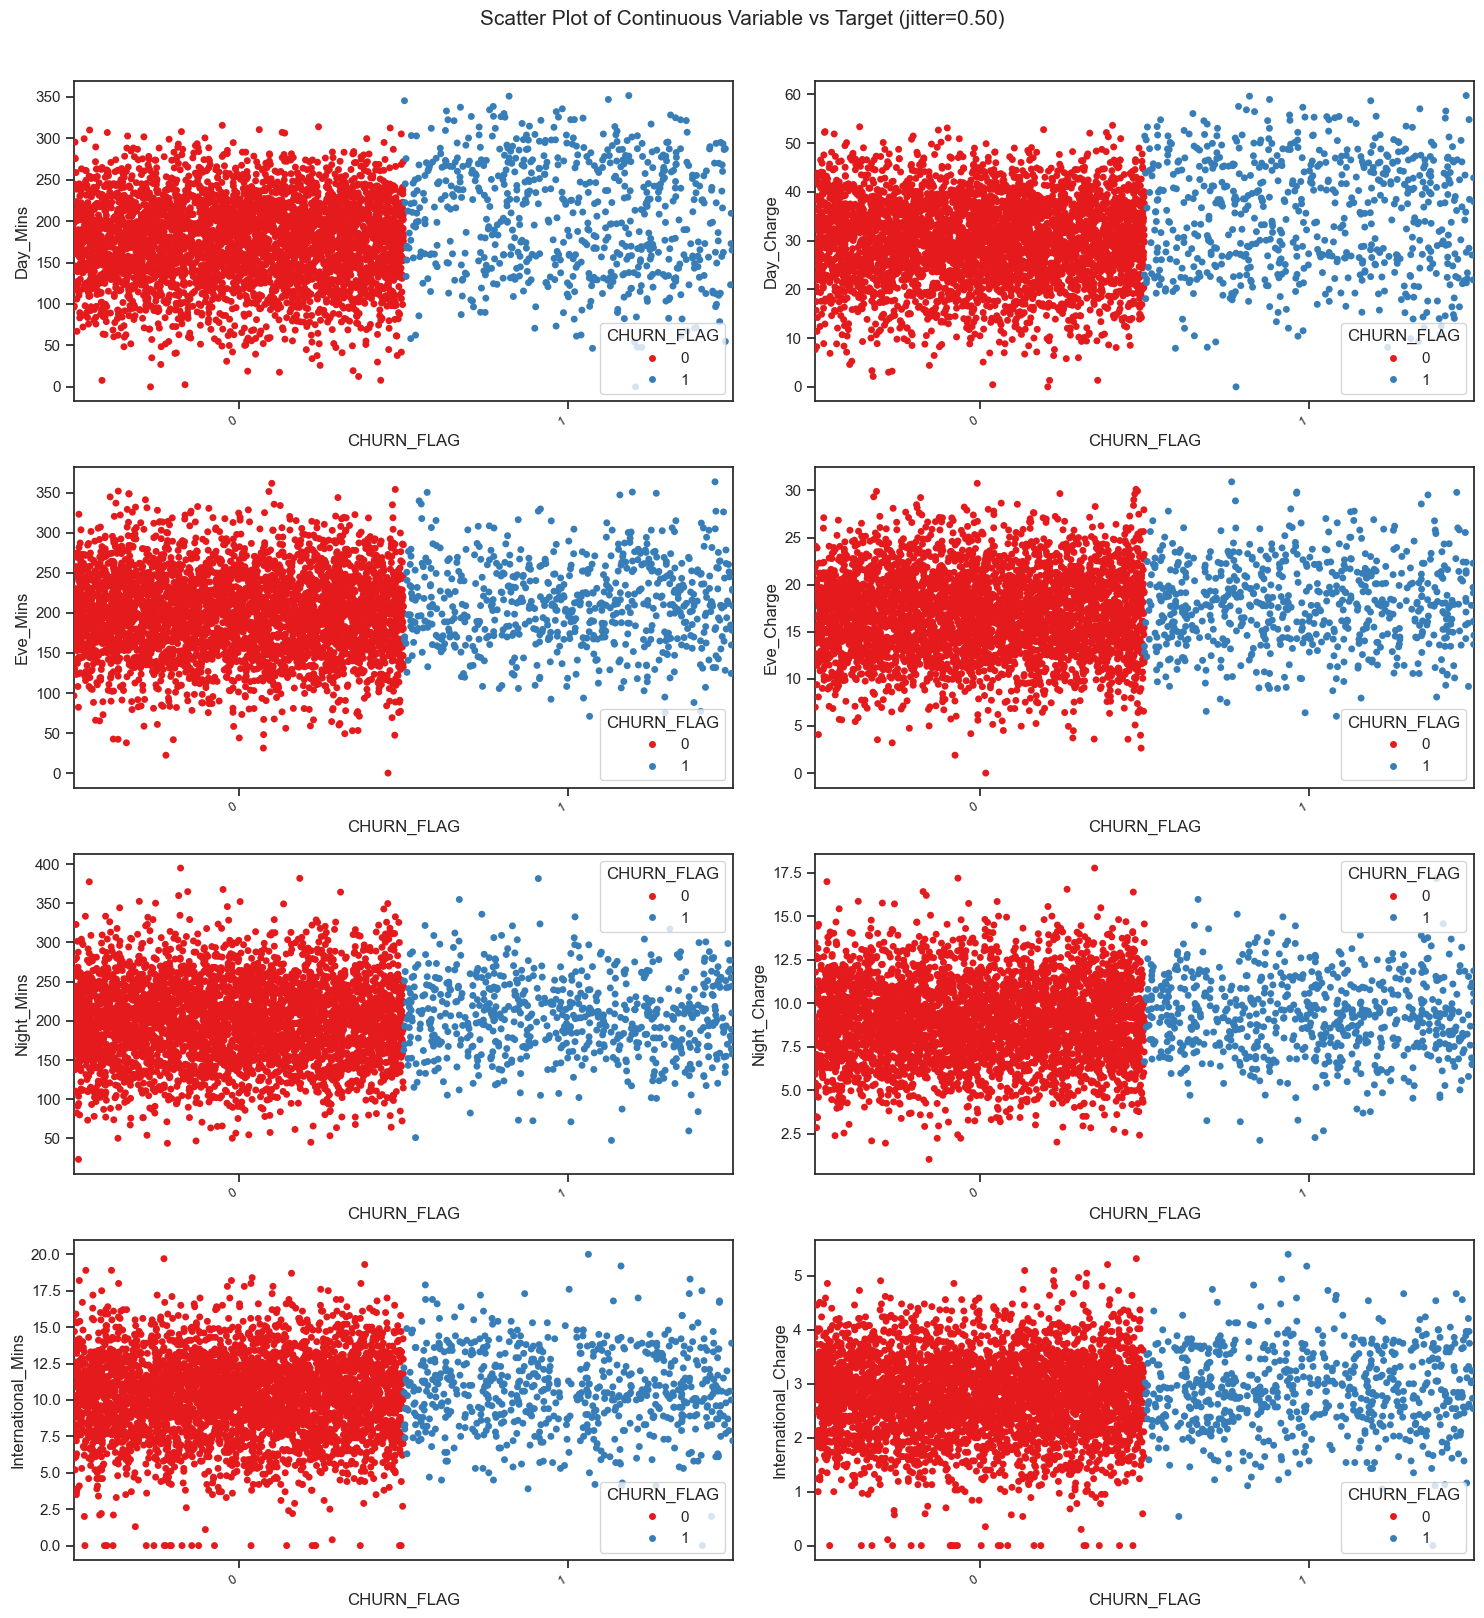

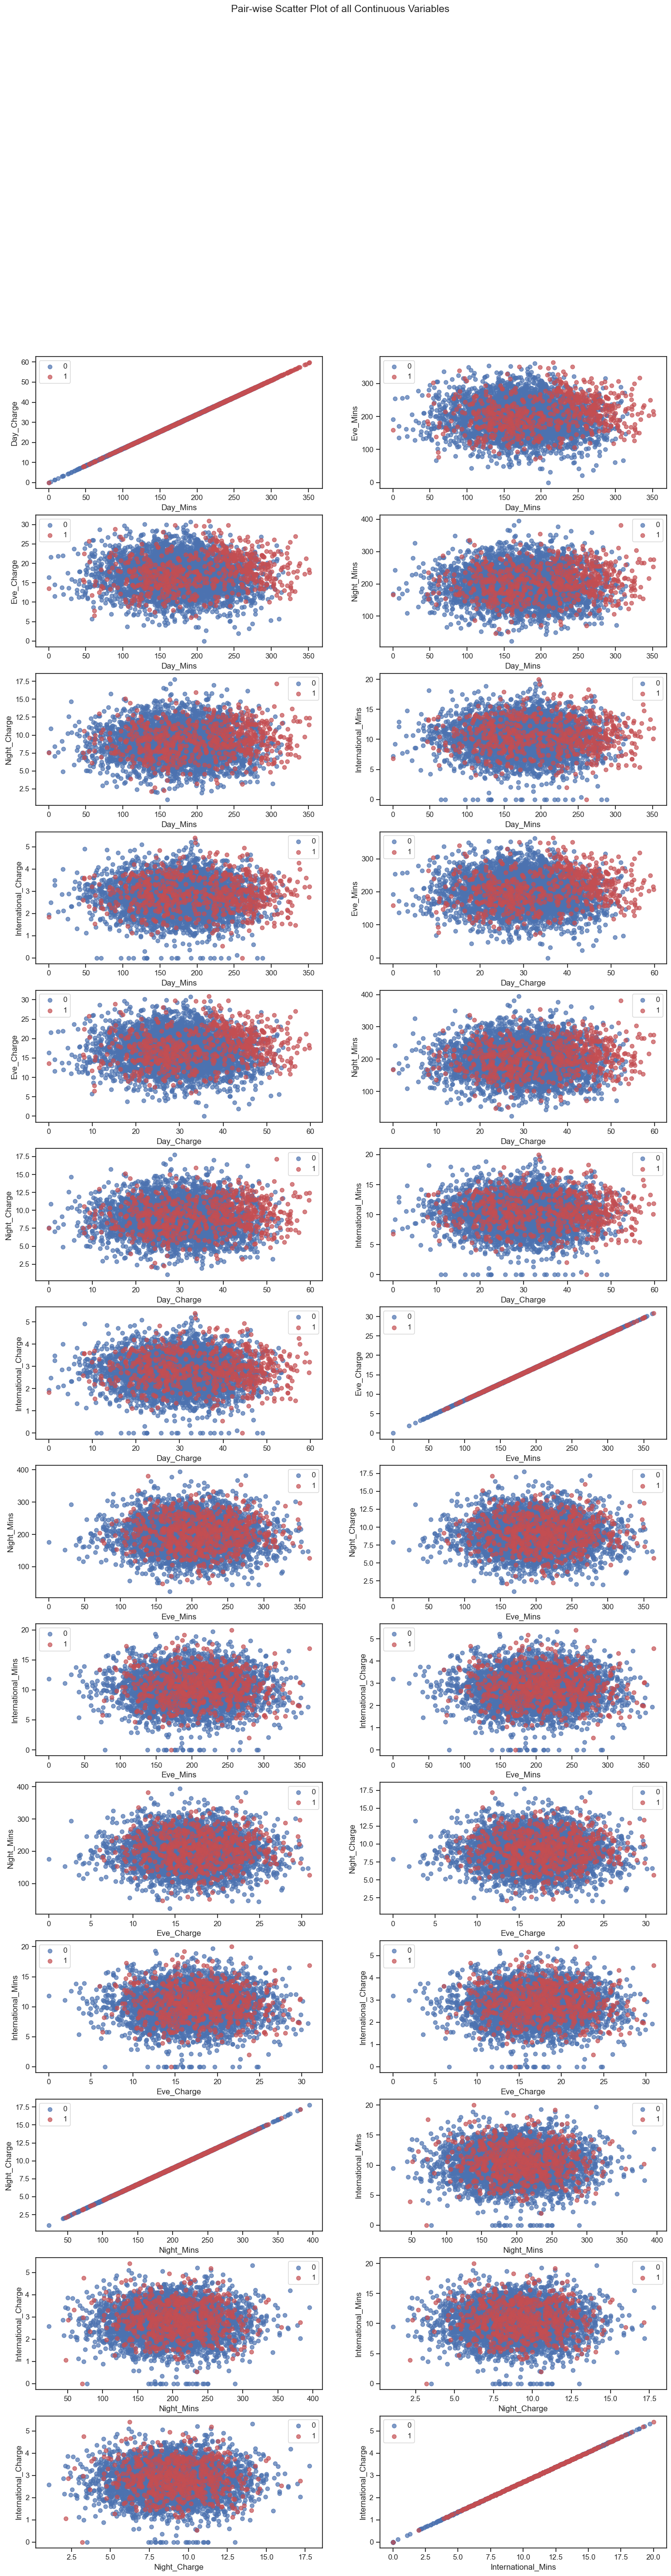

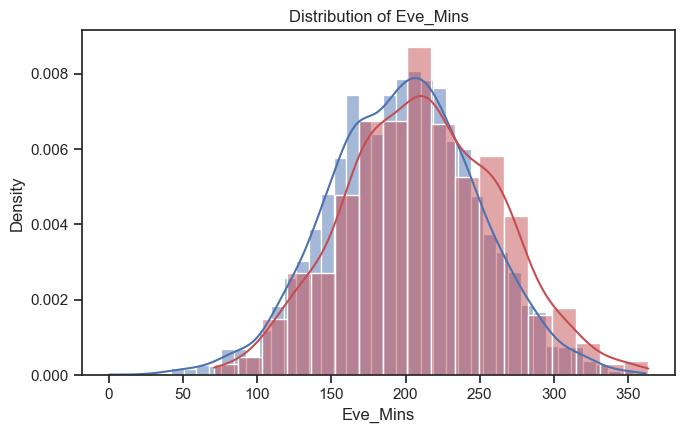

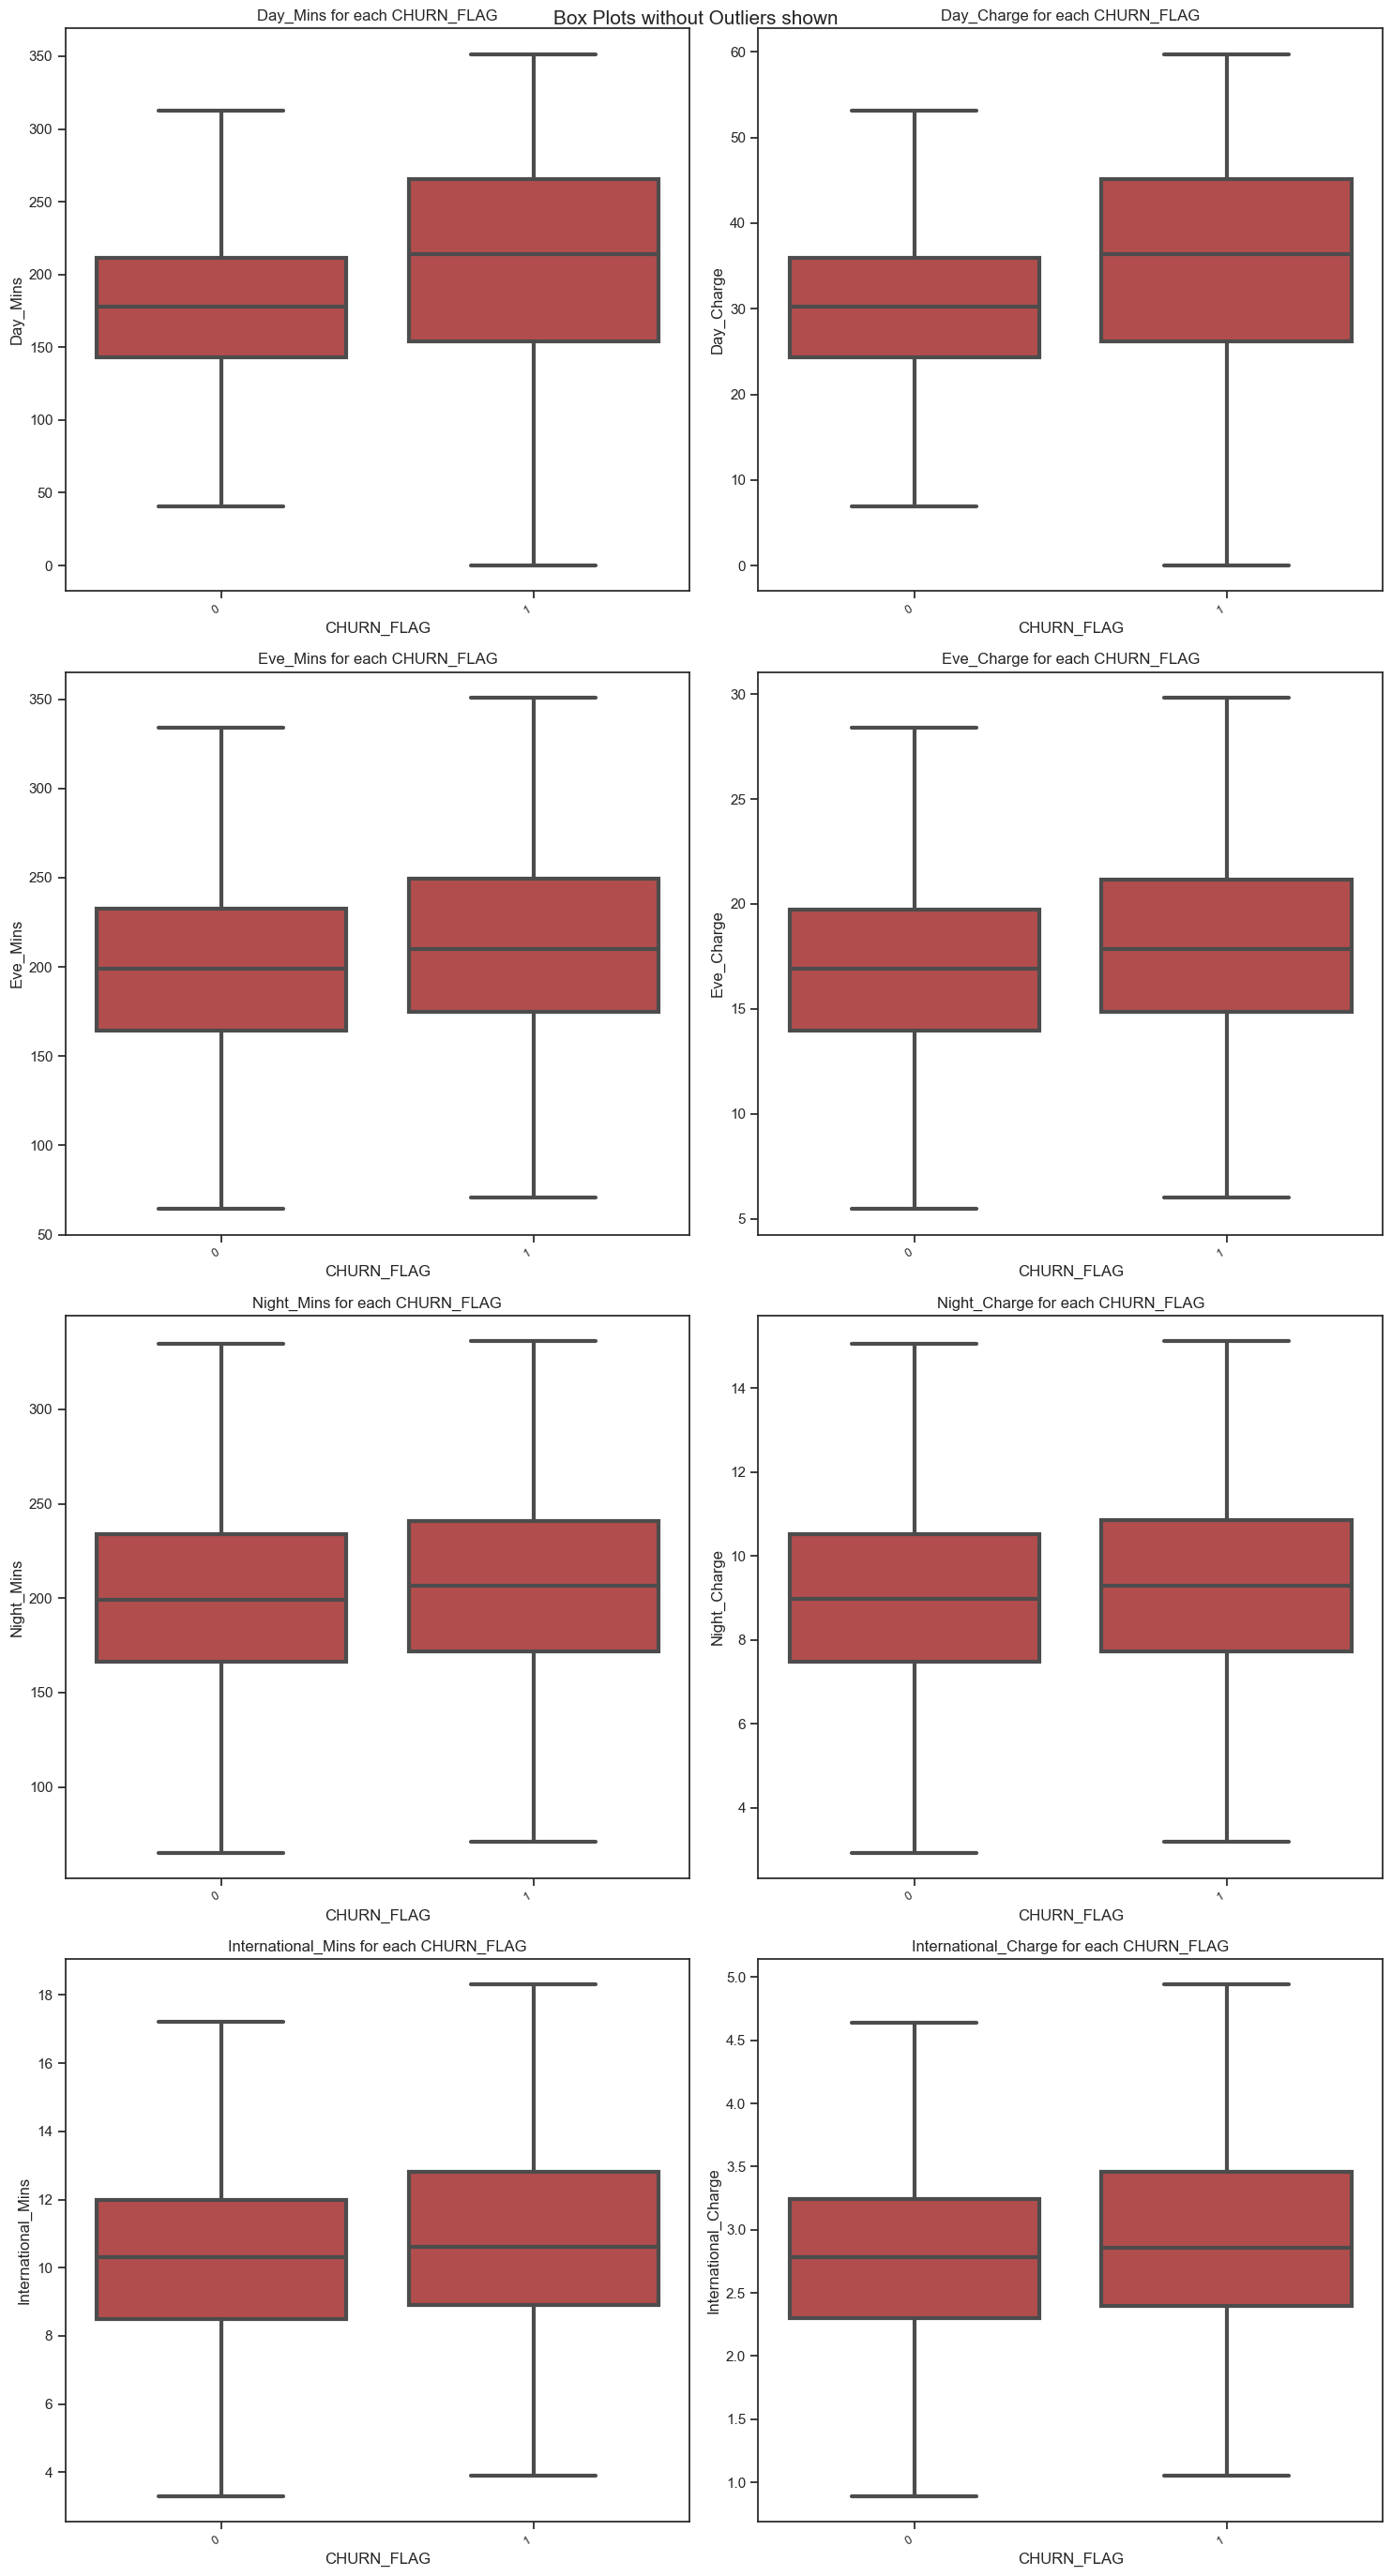

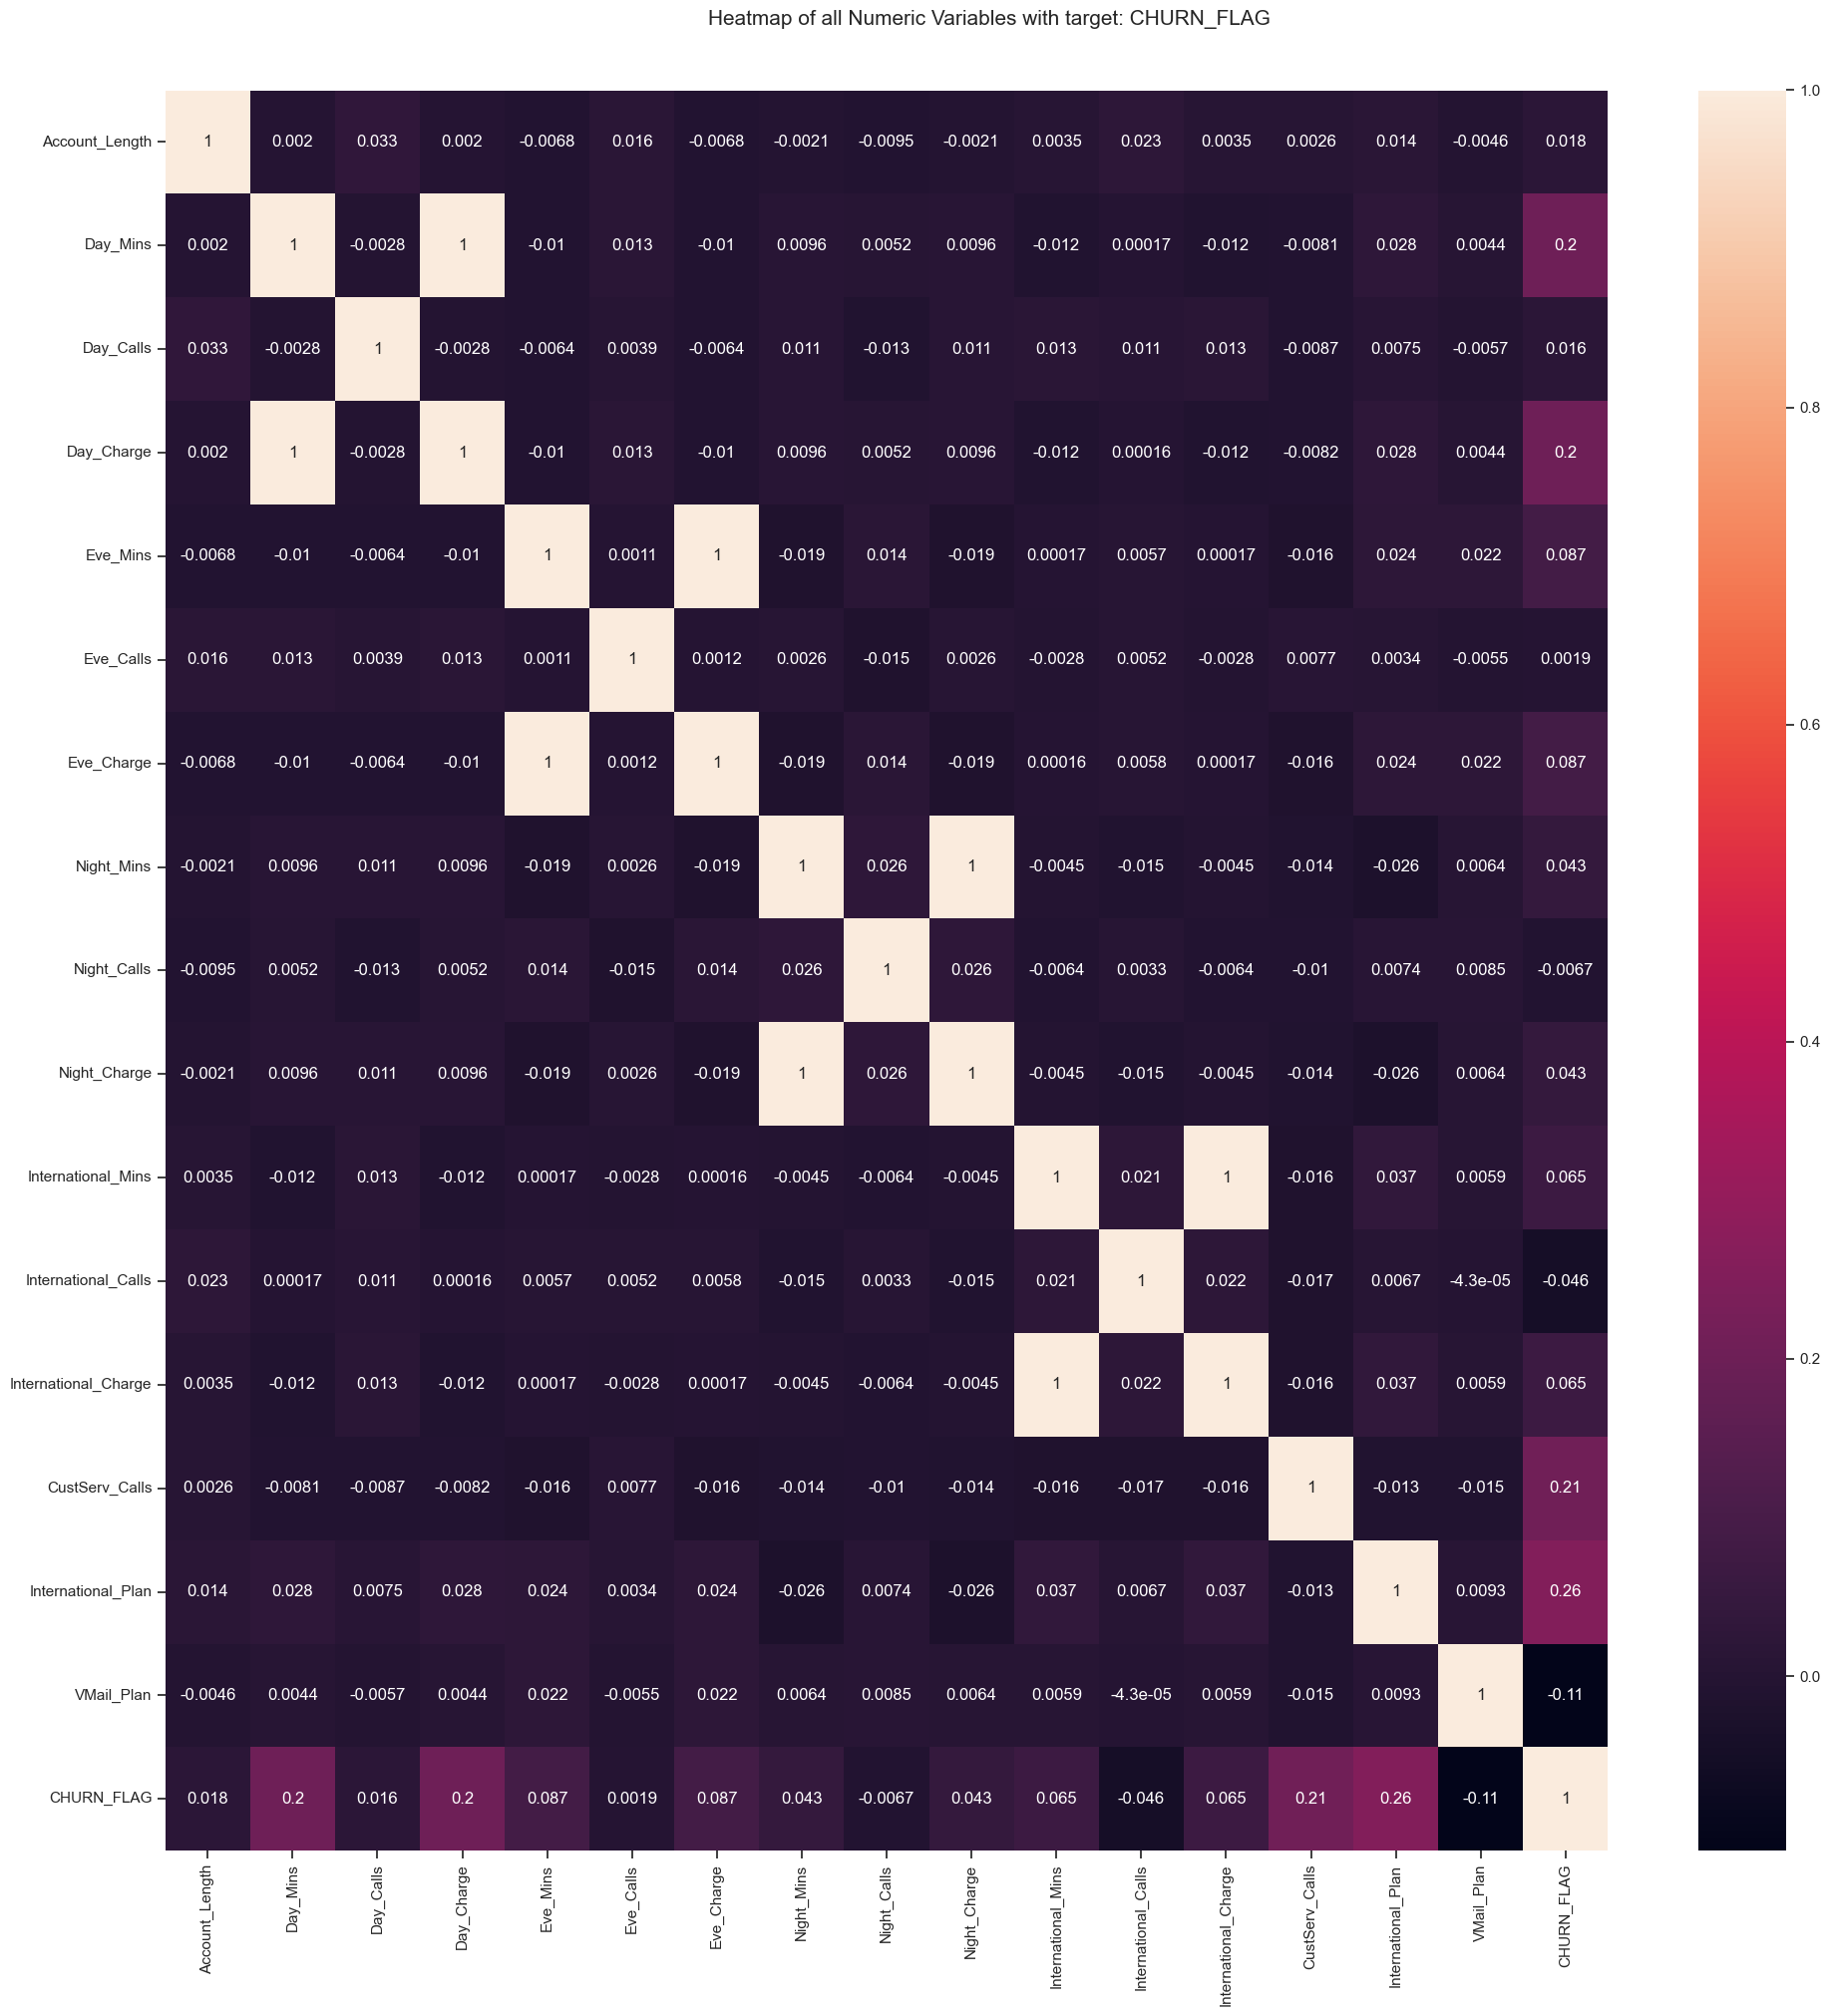

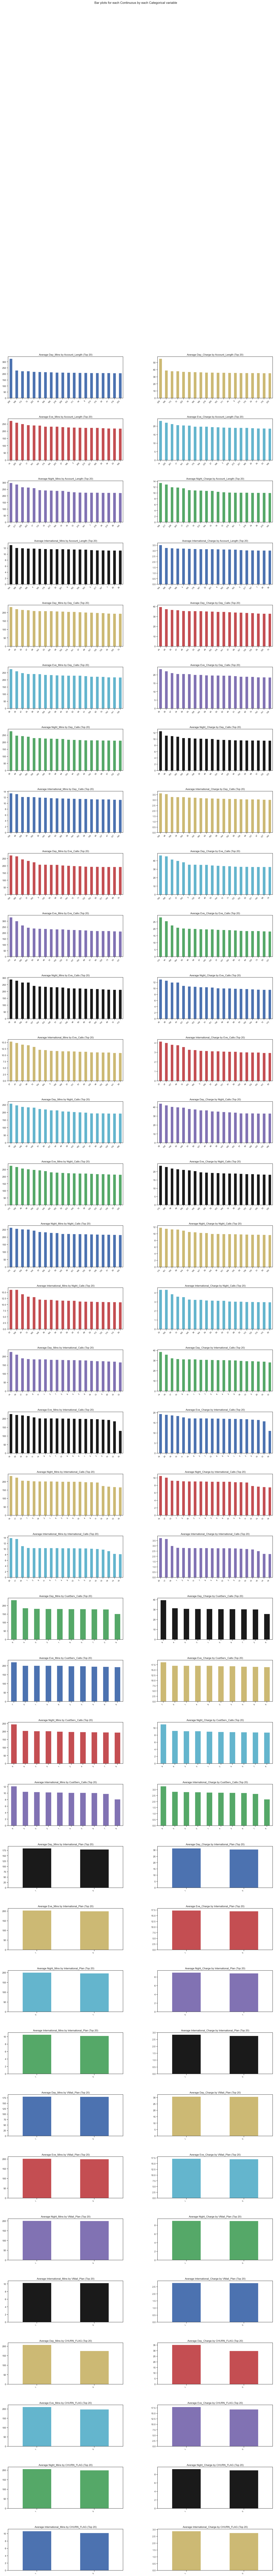

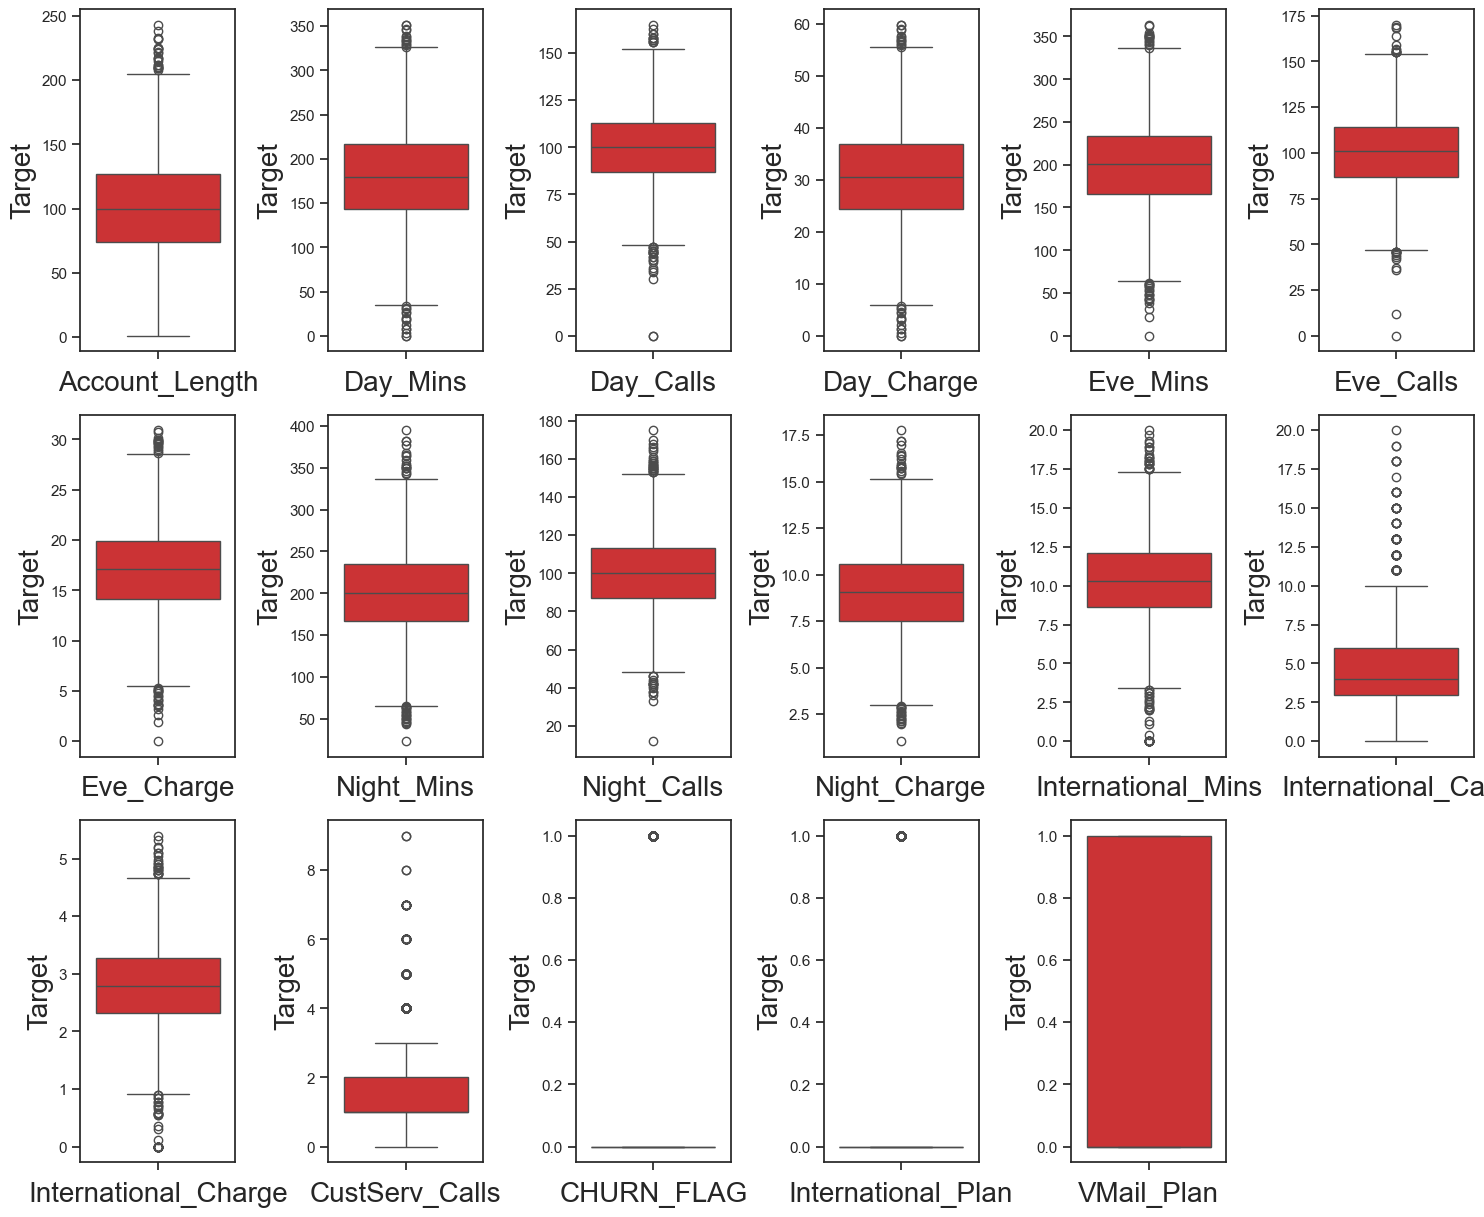

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,20), facecolor='white')#canvas size
plotnumber = 1

for column in df1:
    if plotnumber<=26 :
        ax = plt.subplot(5,6,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [47]:
df1

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0           128         265.1      110        45.07      197.4       99      
1           107         161.6      123        27.47      195.5      103      
2           137         243.4      114        41.38      121.2      110      
3            84         299.4       71        50.90       61.9       88      
4            75         166.7      113        28.34      148.3      122      
...              ...       ...        ...         ...       ...        ...   
4612         57         144.0       81        24.48      187.2      112      
4613        177         189.0       91        32.13      303.1       96      
4614         67         127.5      126        21.68      296.1      129      
4615         98         168.9       98        28.71      226.3      117      
4616        140         204.7      100        34.80      126.8      107      

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0        16.78       244.7         91          11.01            10.0          
1        16.62       254.4        103          11.45            13.7          
2        10.30       162.6        104           7.32            12.2          
3         5.26       196.9         89           8.86             6.6          
4        12.61       186.9        121           8.41            10.1          
...          ...         ...          ...           ...                 ...   
4612     15.91       158.6        122           7.14             8.5          
4613     25.76       163.6        116           7.36            15.7          
4614     25.17       200.9         91           9.04            13.0          
4615     19.24       165.5         96           7.45            14.3          
4616     10.78       202.8        115           9.13            12.1          

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
0              3                   2.70                 1             0       
1              3                   3.70                 1             0       
2              5                   3.29                 0             0       
3              7                   1.78                 2             0       
4              3                   2.73                 3             0       
...                   ...                   ...             ...         ...   
4612           6                   2.30                 3             0       
4613           1                   4.24                 3             0       
4614           3                   3.51                 1             0       
4615           3                   3.86                 0             0       
4616           4                   3.27                 2             0       

      International_Plan  VMail_Plan  
0              0               1      
1              0               1      
2              0               0      
3              1               0      
4              1               0      
...                  ...         ...  
4612           0               1      
4613           0               1      
4614           0               1      
4615           0               1      
4616           0               0      

[4617 rows x 17 columns]

In [48]:
df1.head()

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0        128         265.1      110        45.07      197.4       99      
1        107         161.6      123        27.47      195.5      103      
2        137         243.4      114        41.38      121.2      110      
3         84         299.4       71        50.90       61.9       88      
4         75         166.7      113        28.34      148.3      122      

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0     16.78       244.7         91          11.01            10.0          
1     16.62       254.4        103          11.45            13.7          
2     10.30       162.6        104           7.32            12.2          
3      5.26       196.9         89           8.86             6.6          
4     12.61       186.9        121           8.41            10.1          

   International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
0           3                   2.70                 1             0       
1           3                   3.70                 1             0       
2           5                   3.29                 0             0       
3           7                   1.78                 2             0       
4           3                   2.73                 3             0       

   International_Plan  VMail_Plan  
0           0               1      
1           0               1      
2           0               0      
3           1               0      
4           1               0

## HANDLING OUTLIERS

In [49]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.Account_Length) 
IQR

53.0

In [50]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.Account_Length.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.Account_Length.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [51]:
min_limit

-5.5

In [52]:
max_limit

206.5

In [53]:
df1.loc[df1['Account_Length'] > max_limit]

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
197         208         326.5       67        55.51      176.3      113      
238         215          83.6      148        14.21      120.9       91      
309         209         227.2      128        38.62      258.4       92      
416         224         171.5       99        29.16      160.0      103      
817         243          95.5       92        16.24      163.7       63      
1045        217         176.4      115        29.99      158.8      128      
1093        210         104.6      121        17.78      149.5       71      
1387        212         126.0       96        21.42      144.3       80      
1408        232         165.6      104        28.15      195.9      115      
1551        225         165.4      106        28.12      273.7      109      
1751        225         182.7      142        31.06      246.5       63      
1886        224         111.4      133        18.94      175.0       66      
2150        212         226.0      127        38.42      304.6       83      
2259        210         313.8       87        53.35      147.7      103      
2277        217         123.7      138        21.03      248.5      105      
2700        209         255.1      124        43.37      230.6      110      
3216        221         180.5       85        30.69      224.1       92      
3227        209         153.7      105        26.13      188.6       87      
4260        238         202.0       60        34.34      213.9      105      
4342        216         212.3      106        36.09      191.1       71      
4379        222         218.5       89        37.15      160.7       76      
4389        232         248.2      128        42.19      211.2       96      
4395        233         137.3       94        23.34      232.4       87      

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
197      14.99       181.7        102           8.18            10.7          
238      10.28       226.6        110          10.20            10.7          
309      21.96       183.5         74           8.26             8.9          
416      13.60       212.4        102           9.56             5.0          
817      13.91       264.2        118          11.89             6.6          
1045     13.50       306.6        107          13.80             9.3          
1093     12.71       255.1         67          11.48             6.5          
1387     12.27       302.8        102          13.63             7.6          
1408     16.65       118.3         77           5.32            11.8          
1551     23.26       210.0         93           9.45             8.7          
1751     20.95       218.0        103           9.81             8.8          
1886     14.88       217.2        106           9.77             5.5          
2150     25.89       181.2        132           8.15            12.6          
2259     12.55       192.7         97           8.67            10.1          
2277     21.12       269.6         78          12.13            13.3          
2700     19.60       218.0         69           9.81             8.5          
3216     19.05       205.7        103           9.26             2.4          
3227     16.03       200.8         95           9.04            10.7          
4260     18.18       266.4         90          11.99            12.0          
4342     16.24       224.9         79          10.12             9.4          
4379     13.66       181.6         76           8.17             4.9          
4389     17.95       147.1        117           6.62            10.0          
4395     19.75       206.0        105           9.27             9.8          

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
197            6                   2.89                 2             1       
238            9                   2.89                 0             0       

In [54]:
df1.loc[df1['Account_Length'] < min_limit]

Empty DataFrame
Columns: [Account_Length, Day_Mins, Day_Calls, Day_Charge, Eve_Mins, Eve_Calls, Eve_Charge, Night_Mins, Night_Calls, Night_Charge, International_Mins, International_Calls, International_Charge, CustServ_Calls, CHURN_FLAG, International_Plan, VMail_Plan]
Index: []

In [55]:
df1.loc[df1['Account_Length'] > max_limit]

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
197         208         326.5       67        55.51      176.3      113      
238         215          83.6      148        14.21      120.9       91      
309         209         227.2      128        38.62      258.4       92      
416         224         171.5       99        29.16      160.0      103      
817         243          95.5       92        16.24      163.7       63      
1045        217         176.4      115        29.99      158.8      128      
1093        210         104.6      121        17.78      149.5       71      
1387        212         126.0       96        21.42      144.3       80      
1408        232         165.6      104        28.15      195.9      115      
1551        225         165.4      106        28.12      273.7      109      
1751        225         182.7      142        31.06      246.5       63      
1886        224         111.4      133        18.94      175.0       66      
2150        212         226.0      127        38.42      304.6       83      
2259        210         313.8       87        53.35      147.7      103      
2277        217         123.7      138        21.03      248.5      105      
2700        209         255.1      124        43.37      230.6      110      
3216        221         180.5       85        30.69      224.1       92      
3227        209         153.7      105        26.13      188.6       87      
4260        238         202.0       60        34.34      213.9      105      
4342        216         212.3      106        36.09      191.1       71      
4379        222         218.5       89        37.15      160.7       76      
4389        232         248.2      128        42.19      211.2       96      
4395        233         137.3       94        23.34      232.4       87      

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
197      14.99       181.7        102           8.18            10.7          
238      10.28       226.6        110          10.20            10.7          
309      21.96       183.5         74           8.26             8.9          
416      13.60       212.4        102           9.56             5.0          
817      13.91       264.2        118          11.89             6.6          
1045     13.50       306.6        107          13.80             9.3          
1093     12.71       255.1         67          11.48             6.5          
1387     12.27       302.8        102          13.63             7.6          
1408     16.65       118.3         77           5.32            11.8          
1551     23.26       210.0         93           9.45             8.7          
1751     20.95       218.0        103           9.81             8.8          
1886     14.88       217.2        106           9.77             5.5          
2150     25.89       181.2        132           8.15            12.6          
2259     12.55       192.7         97           8.67            10.1          
2277     21.12       269.6         78          12.13            13.3          
2700     19.60       218.0         69           9.81             8.5          
3216     19.05       205.7        103           9.26             2.4          
3227     16.03       200.8         95           9.04            10.7          
4260     18.18       266.4         90          11.99            12.0          
4342     16.24       224.9         79          10.12             9.4          
4379     13.66       181.6         76           8.17             4.9          
4389     17.95       147.1        117           6.62            10.0          
4395     19.75       206.0        105           9.27             9.8          

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
197            6                   2.89                 2             1       
238            9                   2.89                 0             0       

In [56]:
df1.loc[df1['Account_Length'] > max_limit,'Account_Length']=np.mean(df1.Account_Length)

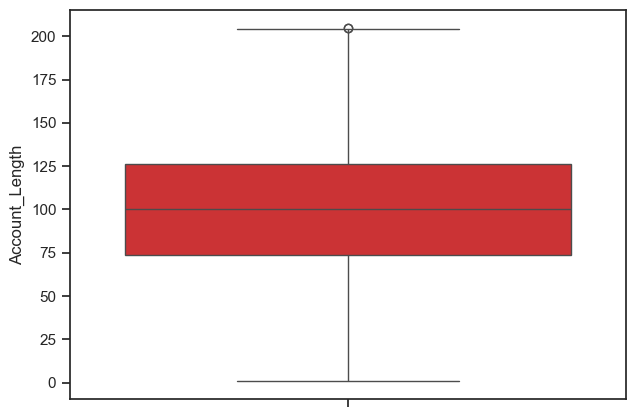

In [57]:
sns.boxplot(df1["Account_Length"])
plt.show()

In [58]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.Day_Mins) 
IQR

73.10000000000002

In [59]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.Day_Mins.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.Day_Mins.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [60]:
min_limit

34.049999999999955

In [61]:
max_limit

326.45000000000005

In [62]:
df1.loc[df1['Day_Mins'] > max_limit,'Day_Mins']=np.mean(df1.Day_Mins)

In [63]:
df1.loc[df1['Day_Mins'] < min_limit]

Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
685         63.0        30.9       113        5.25       187.0      113      
741         66.0        34.0       133        5.78       278.6       61      
1052        98.0        12.5        67        2.13       256.6       90      
1076        53.0        25.9       119        4.40       206.5       96      
1345        98.0         0.0         0        0.00       159.6      130      
1397       101.0         0.0         0        0.00       192.1      119      
1621       138.0        19.5       149        3.32       140.9      109      
1986        70.0         7.9       100        1.34       136.4       83      
2124        43.0        27.0       117        4.59       160.9       97      
2252       148.0        17.6       121        2.99       161.7      125      
2736       127.0         2.6       113        0.44       254.0      102      
2753       134.0         7.8        86        1.33       171.4      100      
3046       110.0        18.9        92        3.21       258.4       81      
3174        36.0        29.9       123        5.08       129.1      117      

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
685      15.90       230.8        101          10.39             8.6          
741      23.68       129.6        120           5.83            11.5          
1052     21.81       169.4         88           7.62             7.7          
1076     17.55       228.1         64          10.26             6.5          
1345     13.57       167.1         88           7.52             6.8          
1397     16.33       168.8         95           7.60             7.2          
1621     11.98       179.7        111           8.09             7.9          
1986     11.59       156.6         89           7.05            12.1          
2124     13.68       279.5         96          12.58            10.7          
2252     13.74       203.1         82           9.14            10.6          
2736     21.59       242.7        156          10.92             9.2          
2753     14.57       186.5         80           8.39            12.9          
3046     21.96       109.6         74           4.93            14.8          
3174     10.97       325.9        105          14.67             8.6          

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
685            7                   2.32                 1             0       
741            3                   3.11                 0             0       
1052           9                   2.08                 1             0       
1076           7                   1.76                 1             0       
1345           1                   1.84                 4             1       
1397           4                   1.94                 1             0       
1621           1                   2.13                 0             0       
1986           1                   3.27                 0             0       
2124           3                   2.89                 3             0       
2252           6                   2.86                 1             0       
2736           5                   2.48                 3             0       
2753           2                   3.48                 2             0       
3046           4                   4.00                 1             0       
3174           6                   2.32                 2             0       

      International_Plan  VMail_Plan  
685            0               1      
741            0               0      
1052           1               0      
1076           0               1      
1345           0               0      
1397           0               0      
1621           0               1      
1986           0               0      
2124           0               0      
2252           0               0      
2736           0               1  

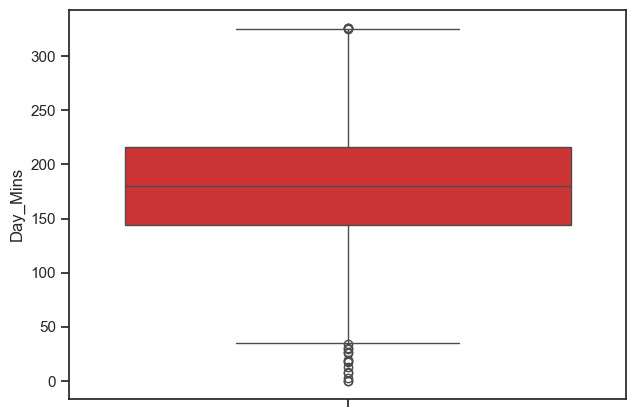

In [64]:
sns.boxplot(df1["Day_Mins"])
plt.show()

In [65]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.Day_Calls) 
IQR

26.0

In [66]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.Day_Calls.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.Day_Calls.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [67]:
min_limit

48.0

In [68]:
max_limit

152.0

In [69]:
df1.loc[df1['Day_Calls'] > max_limit,'Day_Calls']=np.mean(df1.Day_Calls)

In [70]:
df1.loc[df1['Day_Calls'] < min_limit,'Day_Calls']=np.mean(df1.Day_Calls)

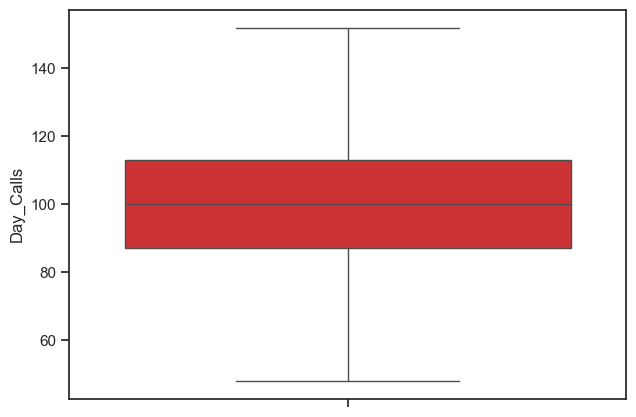

In [71]:
sns.boxplot(df1["Day_Calls"])
plt.show()

In [72]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.Day_Charge) 
IQR

12.43

In [73]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.Day_Charge.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.Day_Charge.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [74]:
min_limit

5.785

In [75]:
max_limit

55.504999999999995

In [76]:
df1.loc[df1['Day_Charge'] > max_limit,'Day_Charge']=np.mean(df1.Day_Charge)

In [77]:
df1.loc[df1['Day_Charge'] < min_limit,'Day_Charge']=np.mean(df1.Day_Charge)

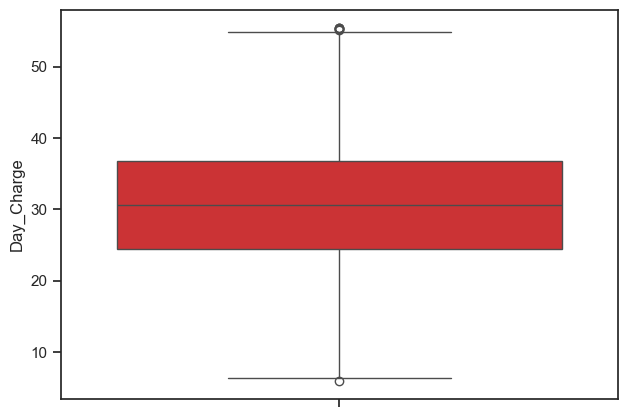

In [78]:
sns.boxplot(df1["Day_Charge"])
plt.show()

In [79]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.Eve_Calls) 
IQR

27.0

In [80]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.Eve_Calls.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.Eve_Calls.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [81]:
min_limit

46.5

In [82]:
max_limit

154.5

In [83]:
df1.loc[df1['Eve_Calls'] > max_limit,'Eve_Calls']=np.mean(df1.Eve_Calls)

In [84]:
df1.loc[df1['Eve_Calls'] < min_limit,'Eve_Calls']=np.mean(df1.Eve_Calls)

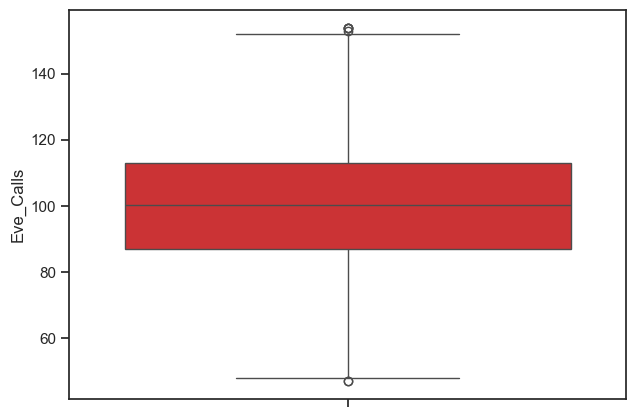

In [85]:
sns.boxplot(df1["Eve_Calls"])
plt.show()

In [86]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.International_Calls) 
IQR

3.0

In [87]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.International_Calls.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.International_Calls.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [88]:
min_limit

-1.5

In [89]:
max_limit

10.5

In [90]:
df1.loc[df1['International_Calls'] > max_limit,'International_Calls']=np.mean(df1.International_Calls)

In [91]:
df1.loc[df1['International_Calls'] < min_limit,'International_Calls']=np.mean(df1.International_Calls)

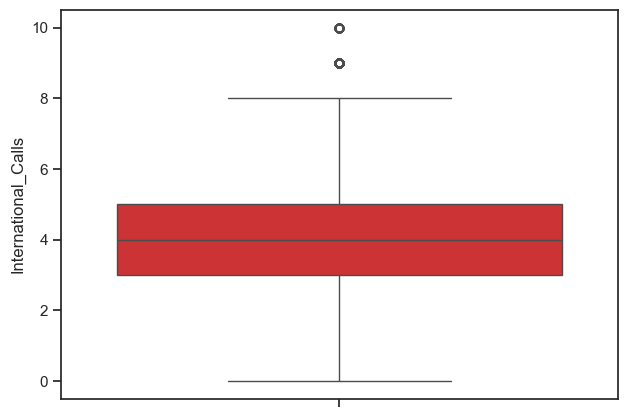

In [92]:
sns.boxplot(df1["International_Calls"])
plt.show()

In [93]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.CustServ_Calls) 
IQR

1.0

In [94]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.CustServ_Calls.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.CustServ_Calls.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [95]:
min_limit

-0.5

In [96]:
max_limit

3.5

In [97]:
df1.loc[df1['CustServ_Calls'] > max_limit,'CustServ_Calls']=np.mean(df1.CustServ_Calls)

In [98]:
df1.loc[df1['CustServ_Calls'] < min_limit,'CustServ_Calls']=np.mean(df1.CustServ_Calls)

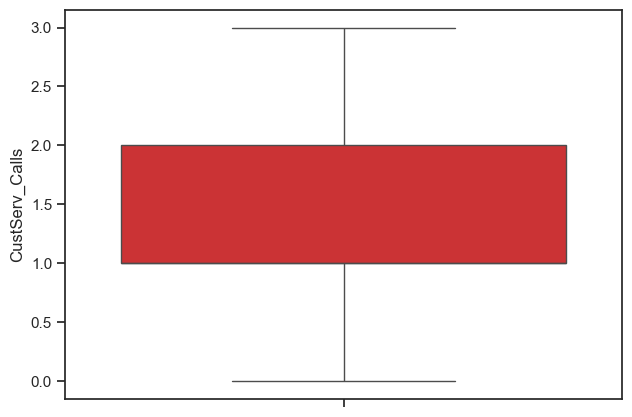

In [99]:
sns.boxplot(df1['CustServ_Calls'])
plt.show()

In [100]:
df1


Account_Length  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0          128.0        265.1     110.0       45.07      197.4      99.0     
1          107.0        161.6     123.0       27.47      195.5     103.0     
2          137.0        243.4     114.0       41.38      121.2     110.0     
3           84.0        299.4      71.0       50.90       61.9      88.0     
4           75.0        166.7     113.0       28.34      148.3     122.0     
...              ...       ...        ...         ...       ...        ...   
4612        57.0        144.0      81.0       24.48      187.2     112.0     
4613       177.0        189.0      91.0       32.13      303.1      96.0     
4614        67.0        127.5     126.0       21.68      296.1     129.0     
4615        98.0        168.9      98.0       28.71      226.3     117.0     
4616       140.0        204.7     100.0       34.80      126.8     107.0     

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0        16.78       244.7         91          11.01            10.0          
1        16.62       254.4        103          11.45            13.7          
2        10.30       162.6        104           7.32            12.2          
3         5.26       196.9         89           8.86             6.6          
4        12.61       186.9        121           8.41            10.1          
...          ...         ...          ...           ...                 ...   
4612     15.91       158.6        122           7.14             8.5          
4613     25.76       163.6        116           7.36            15.7          
4614     25.17       200.9         91           9.04            13.0          
4615     19.24       165.5         96           7.45            14.3          
4616     10.78       202.8        115           9.13            12.1          

      International_Calls  International_Charge  CustServ_Calls  CHURN_FLAG  \
0             3.0                  2.70                1.0            0       
1             3.0                  3.70                1.0            0       
2             5.0                  3.29                0.0            0       
3             7.0                  1.78                2.0            0       
4             3.0                  2.73                3.0            0       
...                   ...                   ...             ...         ...   
4612          6.0                  2.30                3.0            0       
4613          1.0                  4.24                3.0            0       
4614          3.0                  3.51                1.0            0       
4615          3.0                  3.86                0.0            0       
4616          4.0                  3.27                2.0            0       

      International_Plan  VMail_Plan  
0              0               1      
1              0               1      
2              0               0      
3              1               0      
4              1               0      
...                  ...         ...  
4612           0               1      
4613           0               1      
4614           0               1      
4615           0               1      
4616           0               0      

[4617 rows x 17 columns]

In [101]:
df1.shape

(4617, 17)

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Account_Length        4617 non-null   float64
 1   Day_Mins              4617 non-null   float64
 2   Day_Calls             4617 non-null   float64
 3   Day_Charge            4617 non-null   float64
 4   Eve_Mins              4617 non-null   float64
 5   Eve_Calls             4617 non-null   float64
 6   Eve_Charge            4617 non-null   float64
 7   Night_Mins            4617 non-null   float64
 8   Night_Calls           4617 non-null   int64  
 9   Night_Charge          4617 non-null   float64
 10  International_Mins    4617 non-null   float64
 11  International_Calls   4617 non-null   float64
 12  International_Charge  4617 non-null   float64
 13  CustServ_Calls        4617 non-null   float64
 14  CHURN_FLAG            4617 non-null   int64  
 15  International_Plan   

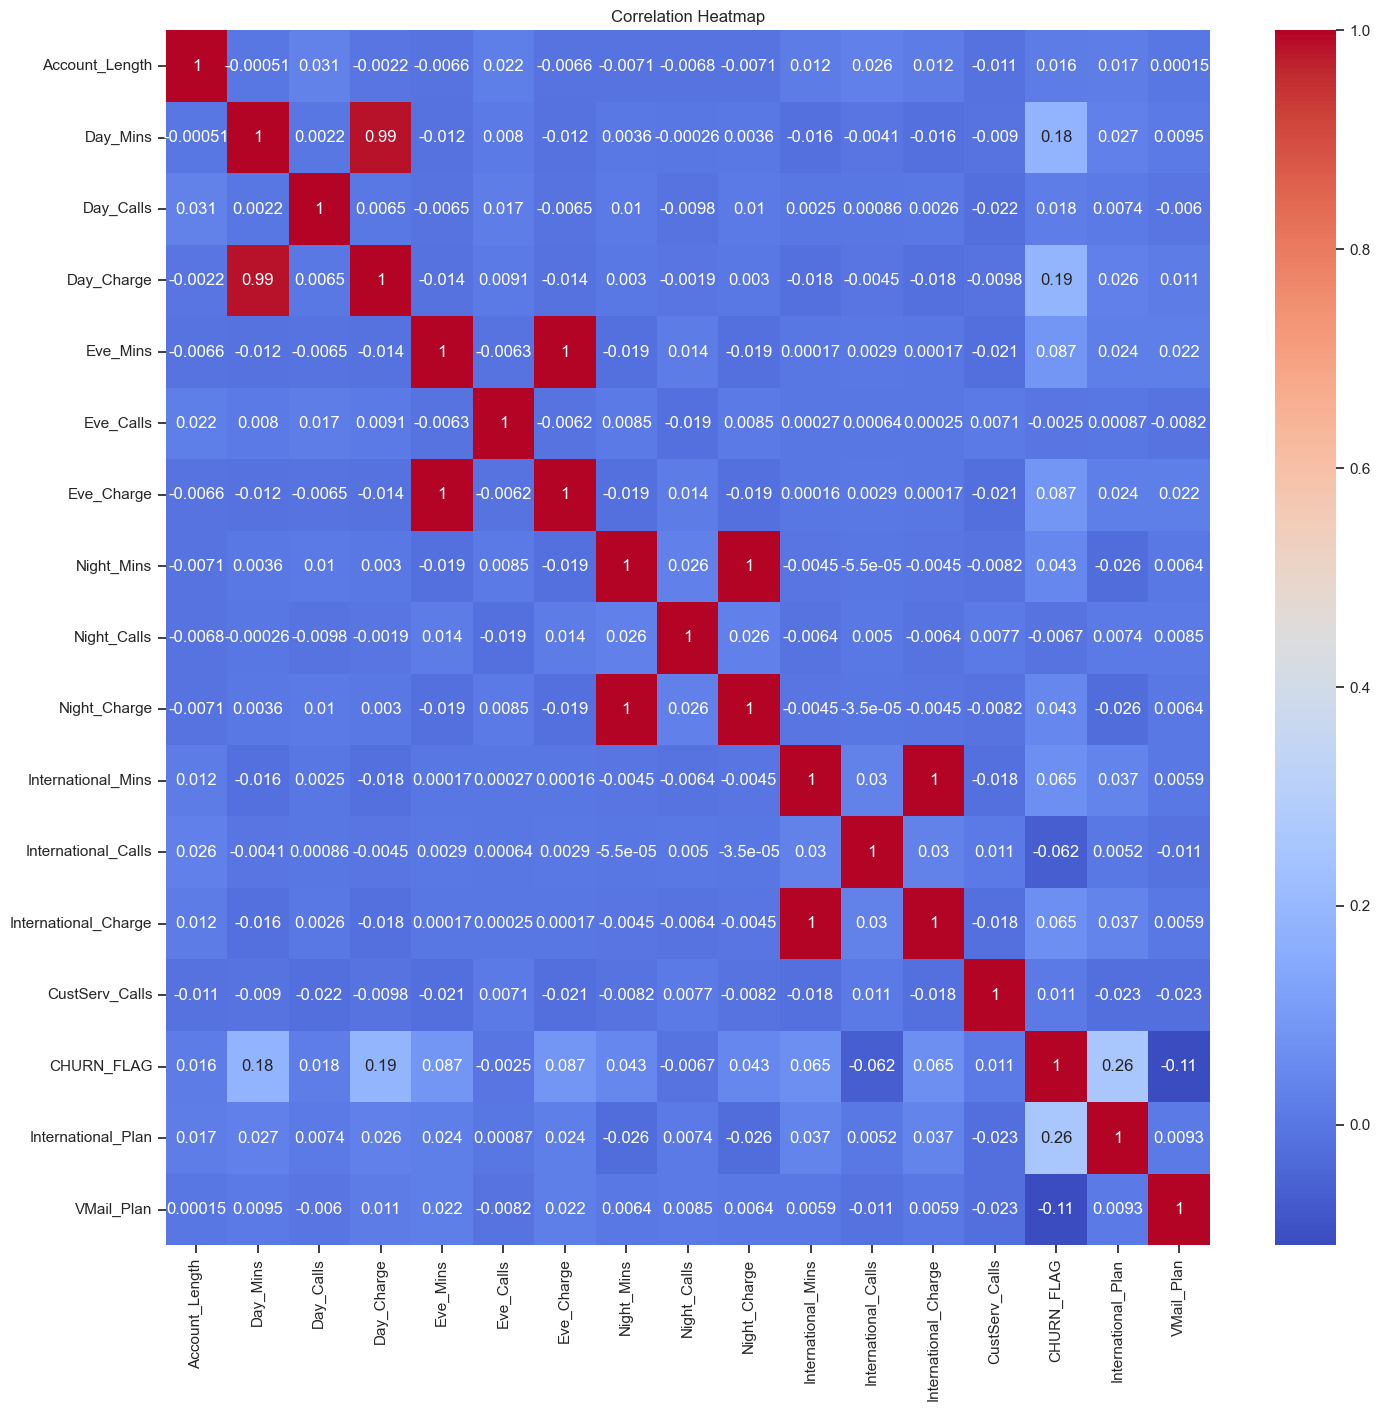

In [103]:
# it will set the figure size of the heatmpa.
plt.figure(figsize = (15, 15))

# It will create large heatmap to visualize the correlation matrix of 'data1'.
# 'annot = True' : It displays the correlation values in each cell.
# 'cmap = "coolwarm"' : "coolwarm" color map is used for better visaulization.
sns.heatmap(df1.corr(), annot = True, cmap = "coolwarm")

# It will set the title of the heatmap.
plt.title("Correlation Heatmap")

# It will display the plot.
plt.show()

## Due to high colleniarity between the columns we need to drop some columns

In [104]:
# Columns to be dropped.
columns_to_drop = ['Day_Charge', 'Eve_Charge', 'Night_Charge', 'International_Charge']

# Looping through each column and dropping it from the DataFrame.
for column in columns_to_drop:
    
    # Dropping the specified column along the specified axis.
    df1.drop(column, axis = 1, inplace = True)

In [105]:
# Columns to be converted to np.int64.
columns_to_convert = ['Day_Mins', 'Night_Mins', 'International_Mins', 'Eve_Mins']

# Looping through each column and converting its data type to np.int64.
for column in columns_to_convert:
    
    # Converting the selected column to np.int64
    df1[column] = df1[column].astype(np.int64)

# Display a message indicating the completion of the conversion
print(f"Conversion of columns to np.int64 completed: {columns_to_convert}")

Conversion of columns to np.int64 completed: ['Day_Mins', 'Night_Mins', 'International_Mins', 'Eve_Mins']


<Axes: >

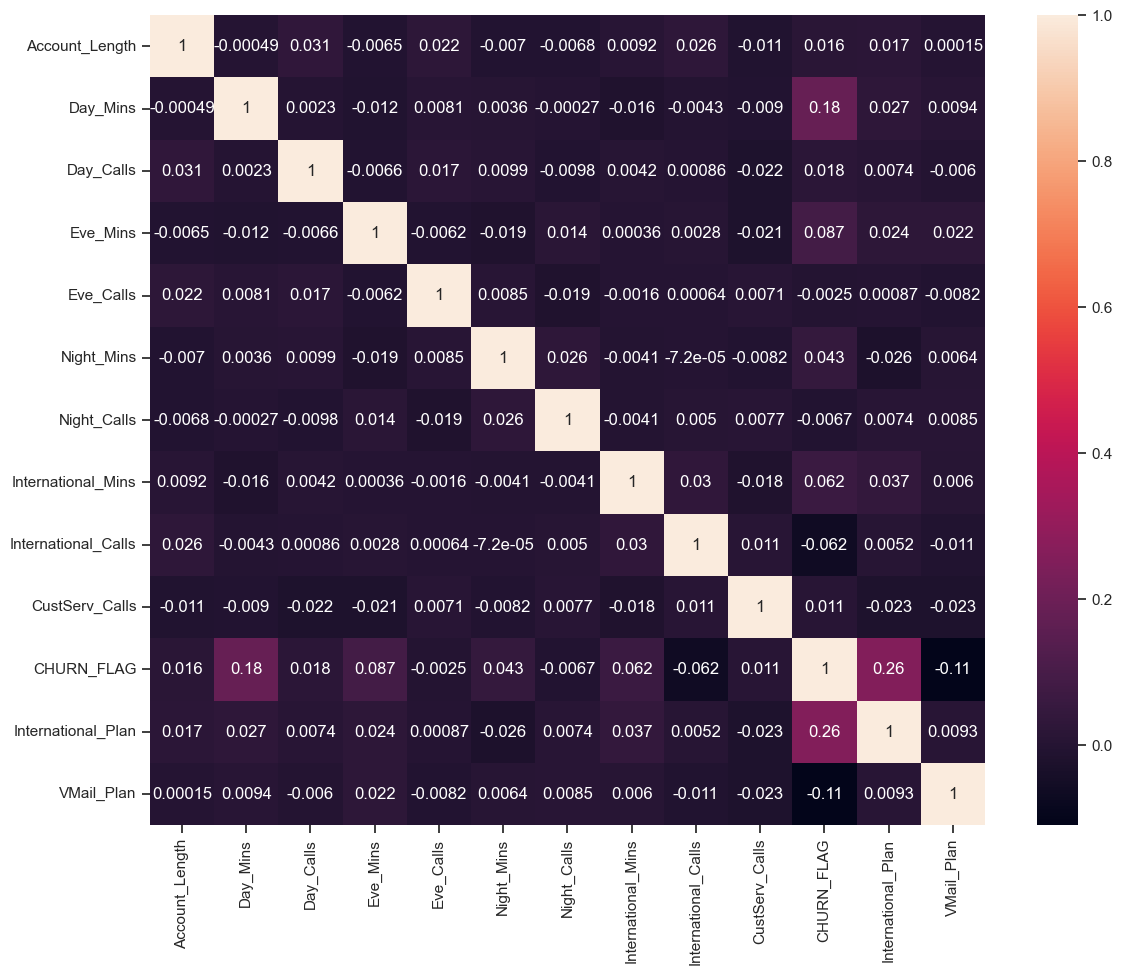

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)

## MODEL CREATION

In [107]:
X = df1.drop(['CHURN_FLAG'], axis = 1)
y = df1['CHURN_FLAG']

In [108]:
# Here, 'x' is all the variables except target.

# Creating features(x) by dropping the "churn" column from the DataFrame.


# Creating the target variable (y) by extracting the 'churn' column from the DataFrame. 
y = df1[['CHURN_FLAG']]

In [109]:
X

Account_Length  Day_Mins  Day_Calls  Eve_Mins  Eve_Calls  Night_Mins  \
0          128.0         265      110.0       197       99.0        244      
1          107.0         161      123.0       195      103.0        254      
2          137.0         243      114.0       121      110.0        162      
3           84.0         299       71.0        61       88.0        196      
4           75.0         166      113.0       148      122.0        186      
...              ...       ...        ...       ...        ...         ...   
4612        57.0         144       81.0       187      112.0        158      
4613       177.0         189       91.0       303       96.0        163      
4614        67.0         127      126.0       296      129.0        200      
4615        98.0         168       98.0       226      117.0        165      
4616       140.0         204      100.0       126      107.0        202      

      Night_Calls  International_Mins  International_Calls  CustServ_Calls  \
0          91              10                  3.0                1.0        
1         103              13                  3.0                1.0        
2         104              12                  5.0                0.0        
3          89               6                  7.0                2.0        
4         121              10                  3.0                3.0        
...           ...                 ...                  ...             ...   
4612      122               8                  6.0                3.0        
4613      116              15                  1.0                3.0        
4614       91              13                  3.0                1.0        
4615       96              14                  3.0                0.0        
4616      115              12                  4.0                2.0        

      International_Plan  VMail_Plan  
0              0               1      
1              0               1      
2              0               0      
3              1               0      
4              1               0      
...                  ...         ...  
4612           0               1      
4613           0               1      
4614           0               1      
4615           0               1      
4616           0               0      

[4617 rows x 12 columns]

In [110]:
y

CHURN_FLAG
0          0    
1          0    
2          0    
3          0    
4          0    
...          ...
4612       0    
4613       0    
4614       0    
4615       0    
4616       0    

[4617 rows x 1 columns]

In [111]:
df1.CHURN_FLAG.value_counts()

CHURN_FLAG
0    3961
1     656
Name: count, dtype: int64

## **SPLIT TRAINING AND TESTING DATA**

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [113]:
y_train.value_counts()

CHURN_FLAG
0             3169
1              524
Name: count, dtype: int64

## USING SMOTE TECHNIQUE

In [114]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [115]:
y_train.value_counts()

CHURN_FLAG
0             3169
1              524
Name: count, dtype: int64

## MODEL CREATION

In [116]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

In [117]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 86.43379366368806
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      3596
           1       0.11      0.62      0.19        97

    accuracy                           0.86      3693
   macro avg       0.55      0.74      0.56      3693
weighted avg       0.97      0.86      0.91      3693



In [118]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)
LR_y_train_predict=LR.predict(X_test)
accuracy = accuracy_score(y_test,LR_y_train_predict)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test,LR_y_train_predict)
print("\n",classification)

Accuracy: 58.44155844155844 %

               precision    recall  f1-score   support

           0       0.91      0.57      0.70       792
           1       0.21      0.67      0.31       132

    accuracy                           0.58       924
   macro avg       0.56      0.62      0.51       924
weighted avg       0.81      0.58      0.65       924



## CROSS VALIDATION ON LOGISTIC REGRESSION

In [119]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(LR, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of Logistic Regression:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of Logistic Regression: 0.8607342404522449
Std: 0.008413414140171499


## GRID SEARCH CV ON LOGISTIC REGRESSION(HYPERPARATMETER TUNING)

In [120]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Create a logistic regression model
LR = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(LR, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [121]:
dt1 = LogisticRegression(C=0.1, penalty='l2')

# Fit the model to the training data
dt1.fit(X_train,y_train)

# Make predictions on the test data
y_hat1 = dt1.predict(X_test)

# Calculate and print the accuracy
acc2 = accuracy_score(y_test, y_hat1)
print("Accuracy:", acc2 * 100, "%")

Accuracy: 86.03896103896103 %


## KNN (K NEAREST NEIGHBORS) CLASSIFIER 

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8506493506493507

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       792
           1       0.45      0.20      0.28       132

    accuracy                           0.85       924
   macro avg       0.66      0.58      0.60       924
weighted avg       0.82      0.85      0.83       924


Confusion Matrix:
 [[759  33]
 [105  27]]


## CROSS VALIDATION ON KNN-CLASSIFIER

In [123]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of KNN:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of KNN: 0.8531542571672723
Std: 0.010601075325332452


## GRID-SEARCH CV ON KNN-HYPERPARAMETER TUNNING

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a kNN pipeline with a scaler
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],  # Adjust based on your problem
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}


## KNN WITH BEST HYPERPARAMETER TUNNING

In [125]:
# Create a kNN model with specified hyperparameters
dt1 = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')

# Fit the model to the training data
dt1.fit(X_train, y_train)

# Make predictions on the test data
y_hat1 = dt1.predict(X_test)

# Calculate and print the accuracy
acc2 = accuracy_score(y_test, y_hat1)
print("Accuracy:", acc2 * 100, "%")

Accuracy: 86.90476190476191 %


## SVM CLASSIFIER

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
svc = SVC()
svc.fit(X_train_smote, y_train_smote)
y_hat = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 82.25108225108225 %

               precision    recall  f1-score   support

           0       0.90      0.89      0.90       792
           1       0.38      0.40      0.39       132

    accuracy                           0.82       924
   macro avg       0.64      0.65      0.64       924
weighted avg       0.83      0.82      0.82       924



## CROSS-VALIDATION ON SVM

In [128]:
# Perform cross-validation and compute accuracy scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of SVC:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of SVC: 0.8581340207153655
Std: 0.001341789416362355


## DECISION TREE CLASSIFIER

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(X_train_smote, y_train_smote)
y_hat=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 89.28571428571429 %

               precision    recall  f1-score   support

           0       0.95      0.93      0.94       792
           1       0.61      0.70      0.65       132

    accuracy                           0.89       924
   macro avg       0.78      0.81      0.79       924
weighted avg       0.90      0.89      0.90       924



## CROSS VALIDATION ON DECISION TREE

In [130]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Decision Tree Classifier:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of Decision Tree Classifier: 0.908165009249608
Std: 0.010229834265704365


## GRID-SEARCH CV ON DECISION TREE-HYPERPARAMETER TUNNING

In [131]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(X_train_smote,y_train_smote)

best_params = tree_cv.best_params_ 

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


## DECISION TREE WITH BEST HYPERPARAMETER TUNNING

In [132]:
dt1=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
dt1.fit(X_train,y_train)
y_hat1=dt1.predict(X_test)
acc2=accuracy_score(y_test,y_hat1)
print("Accuracy:",acc2*100,"%")

Accuracy: 92.31601731601732 %


## **RANDOM FOREST CLASSIFIER**

In [133]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train_smote,y_train_smote)
y_predict=rf_clf.predict(X_test)
acc2=accuracy_score(y_test,y_predict)
print("Accuracy:",acc2*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy: 91.77489177489177 %

               precision    recall  f1-score   support

           0       0.94      0.97      0.95       792
           1       0.76      0.62      0.68       132

    accuracy                           0.92       924
   macro avg       0.85      0.79      0.82       924
weighted avg       0.91      0.92      0.91       924



In [134]:
## CROSS VALIDATION 

In [139]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Random Forest:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of Random Forest: 0.9400061977068486
Std: 0.008655354884794403


## HYPERPARAMETER TUNNING OF RANDOM FOREST CLASSIFIER

In [138]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best params: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False})


## RANDOM FOREST WITH BEST HYPERPARAMETER

In [140]:
rf_clf2 = RandomForestClassifier(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 20, bootstrap= False) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 93.18181818181817 %


## GRADIENT BOOSTING

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote,y_train_smote) ## fitting the data
y_gbm=gbm.predict(X_test)
accu_scor=accuracy_score(y_test,y_gbm)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_gbm)
print("\n",classification)

Accuracy: 92.20779220779221 %

               precision    recall  f1-score   support

           0       0.96      0.95      0.95       792
           1       0.71      0.76      0.74       132

    accuracy                           0.92       924
   macro avg       0.84      0.85      0.84       924
weighted avg       0.92      0.92      0.92       924



## CROSS VALIDATION

In [142]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(gbm, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Gradient Boosting:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of Gradient Boosting: 0.9460672732907007
Std: 0.009818684458163682


# GRID SEARCH CV ON GRADIENT BOOSTING(HYPERPARAMETER TUNING)

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target vector
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [147]:
 GB2 = GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, min_samples_leaf=2, min_samples_split= 10, n_estimators= 100) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 98.7012987012987 %


## XGBOOST 

In [148]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_smote and y_train_smote are preprocessed and represent your training data
# Use LabelEncoder to transform class labels
label_encoder = LabelEncoder()
y_train_smote_encoded = label_encoder.fit_transform(y_train_smote)

# Create an XGBoost classifier
xgb_r = XGBClassifier()

# Fit the model to the training data
xgb_r.fit(X_train_smote, y_train_smote_encoded)

# Assuming X_test is preprocessed and represents your test data
# Transform the class labels in y_test using the same label encoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test data
y_hat = xgb_r.predict(X_test)

# Calculate and print the accuracy
accu_scor = accuracy_score(y_test_encoded, y_hat)
print("Accuracy:", accu_scor * 100, "%")

# Display the classification report
classification = classification_report(y_test_encoded, y_hat)
print("\n", classification)

Accuracy: 99.13419913419914 %

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       799
           1       0.98      0.95      0.97       125

    accuracy                           0.99       924
   macro avg       0.99      0.97      0.98       924
weighted avg       0.99      0.99      0.99       924



## CROSS VALIFATION OF XGBOOST

In [149]:
cv_scores = cross_val_score(xgb_r, X_train_smote, y_train_smote_encoded, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.80047319 0.98343849 0.98501577 0.98026835 0.98184688]
Mean CV Accuracy: 0.9462085355256835


## HYPERPARAMETER TUNNING OF XGBOOST

In [150]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define a parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}


In [151]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train_smote, y_train_smote, X_test, and y_test defined

# Create an XGBoost classifier with the specified parameters
xgb_clf = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.9
)

# Fit the XGBoost classifier to the SMOTE training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_predict = xgb_clf.predict(X_test)

# Calculate and print the accuracy
acc = accuracy_score(y_test, y_predict)
print("Accuracy:", acc * 100, "%")

Accuracy: 95.12987012987013 %


## ANN (Artificial Neural Network)

In [152]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)
model.fit(X_train_smote,y_train_smote) 
y_predict = model.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_predict)*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy : 13.528138528138529 %

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       799
           1       0.14      1.00      0.24       125

    accuracy                           0.14       924
   macro avg       0.07      0.50      0.12       924
weighted avg       0.02      0.14      0.03       924



## CROSS VALIDATION OF ANN

In [153]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Your data (X_train_smote, y_train_smote, X_test, y_test) should be defined before this point

# Create the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50, 3),
                      learning_rate_init=0.1,
                      max_iter=100,
                      random_state=2)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the results
print("Cross Validation Score of ANN:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of ANN: 0.9460672732907007
Std: 0.009818684458163682


## HYPERPARAMETER TUNNING OF ANN

In [154]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Your data (X_train_smote, y_train_smote, X_test, y_test) should be defined before this point

# Create the MLPClassifier
model = MLPClassifier(random_state=2)

# Define the hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50, 3), (100, 3), (50, 50, 3)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [50, 100, 150],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'hidden_layer_sizes': (50, 3), 'learning_rate_init': 0.01, 'max_iter': 50}


## ANN WITH BEST HYPERPARAMETER

In [155]:
ANN2 = MLPClassifier(hidden_layer_sizes= (50,3), learning_rate_init= 0.01, max_iter=50) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 98.80952380952381 %


## ALL MODEL REPORT
* Logistic Regression :- 86.433%
* Cross validation on logistic regression :- 0.86073%
* Logistic Regression with best hyperparameter Tuning:- 86.038%


* Support Vector Machine :- 82.25%
* Cross validation on SVM :- 0.8581% 


* K-Nearest Neighbor :- 85.064% 
* Cross validation on KNN :- 0.8531%
* K-Nearest Neighbor with best hyperparameter :- 86.90%

* Decision Tree Classifier :- 89.285% 
* Cross validation on Decision Tree Classifier :- 0.9081%
* Decision Tree with best hyperparameter :- 92.316%


* Random Forest Classifier :- 91.774%
* Cross validation on Random Forest Classifier :- 0.9400%
* Random Forest with best hyperparameter :- 93.18%


* Gradient Boosting :- 92.20%
* Cross validation on Gradient Boosting :- 0.946% 
* Gradient Boosting with best hyperparameter :- 98.701%

* XGBoost :- 99.134%
* Cross validation on XGBoost :- 0.946%
* XGBoost with best hyperparameter :- 95.12%


* Artificial Neural Network :- 13.528%
* Cross validation on  ANN :- 0.94606%
* ANN with best hyperparameter :- 98.809%

### XGBoost Accuracy:- 99.134%
### Gradient Boosting with best hyperparameter of 98.701%
### ANN with best hyperparameter of 98.809%

In [160]:
# Creating a list of 'Accuracy Score' for different algorithms.
scores = [86.433, 85.81, 86.90, 92.31, 93.18,  98.701, 99.13,98.80]

# List of algorithm names.
algorithms = ["Logistic Regression", "Cross validation on SVM", "K-Nearest Neighbor with best hyperparameter",
              "Decision Tree with best hyperparameter ", "Random Forest with best hyperparameter", "Gradient Boosting with best hyperparameter",
              "Xtreme Gradient Boosting", "ANN with best hyperparameter"]

# Looping through each algorithm and printing its Accuracy Score.
for i in range(len(algorithms)):

   print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 86.433%
The accuracy score achieved using Cross validation on SVM is: 85.81%
The accuracy score achieved using K-Nearest Neighbor with best hyperparameter is: 86.9%
The accuracy score achieved using Decision Tree with best hyperparameter  is: 92.31%
The accuracy score achieved using Random Forest with best hyperparameter is: 93.18%
The accuracy score achieved using Gradient Boosting with best hyperparameter is: 98.701%
The accuracy score achieved using Xtreme Gradient Boosting is: 99.13%
The accuracy score achieved using ANN with best hyperparameter is: 98.8%


## CONCLUSION :

#### From the above result, XGBoost with 99.13 Accuracy, Gradient Boosting with best hyperparameter of 98.701, and ANN with best hyperparameter of 98.809% making it the best model for predicting customer churn. By dealing with these important factors, No-Churn Telecom can keep more customers and make them want to stay. The CHURN_FLAG column can be used to create special campaigns that encourage customers to stay with the CHURN company.

In [161]:
import pickle

In [162]:
with open("BUSINESSCASE for PRCL-0017.pkl", "wb") as file:
    pickle.dump(accuracy, file)

In [163]:
with open("BUSINESSCASE for PRCL-0017.pkl", "rb") as file:
    Accuracy = pickle.load(file)

### THANK YOU